In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.colors
from matplotlib.patches import Patch
import os
from manuscript_functions.colors import default_cmap, timepoints_cmap, id_cmap, nonmyeloid_cmap, cmap_24, patient_to_id

In [2]:
sns.set(rc={"figure.dpi":600, 'savefig.dpi':300}, font="Arial")
# mpl.rcParams['font.sans-serif'] = "Arial"
# mpl.rcParams['font.family'] = "sans-serif"

In [3]:


datapath = "/Users/adr/Box/iPC_work/Local_files_for_paper/Updated/Heterogeneity/"
os.chdir(datapath)

cell_meta = pd.read_csv("/Users/adr/Box/iPC_work/Local_files_for_paper/Updated/local_all_cells_meta_clust_celltype.csv",
                        index_col=0)
file_data = pd.read_excel("/Users/adr/Box/iPC_AML/Data/metadata_patients_20230414.xlsx", 
                          sheet_name="Patients_naw")
file_data = file_data.loc[file_data["patient_id"]!="HD13",:]

cell_meta["PatientID"] = [patient_to_id[patient] for patient in cell_meta["patient_id"]]
file_data["PatientID"] = [patient_to_id[patient] for patient in file_data["patient_id"]]


In [4]:
fig_dir = "/Users/adr/Box/iPC_AML/Figures/updated_fcs/Individuality/"

# Marker space, all cells

In [5]:
# Load results from CCC
# A = np.load("100_nearest_neighbours.csv.npy")
# fileID_classes = pd.read_csv("file_id_classes_p.csv", index_col=0)
# fileID = pd.read_csv("file_id_post_p.csv", index_col=0)
# timepoint_classes = pd.read_csv("time_point_classes_p.csv", index_col=0)
# timepoint = pd.read_csv("time_point_post_p.csv", index_col=0)
patientID_classes = pd.read_csv("patient_id_classes_p.csv", index_col=0)
patientID = pd.read_csv("patient_id_post_p.csv", index_col=0)
# clusterID_classes = pd.read_csv("cluster_id_classes_p.csv", index_col=0)
# clusterID = pd.read_csv("cluster_id_post_p.csv", index_col=0)

In [6]:
# Make file ID numeric
# fileID.columns = fileID.columns[:-2].astype("int64").append(fileID.columns[-2:])
# fileID_classes.columns = fileID_classes.columns.astype("int64")

# Replace patient name by ID
patientID.columns = [patient_to_id[col] if col in patient_to_id.keys() else col for col in patientID.columns]
patientID["class"] = [patient_to_id[p] for p in patientID["class"]]

patientID_classes.columns = [patient_to_id[col] if col in patient_to_id.keys() else col for col in patientID_classes.columns]
patientID_classes.index = [patient_to_id[col] if col in patient_to_id.keys() else col for col in patientID_classes.index]

# Sort on patient ID
patientID_classes = patientID_classes.sort_index(key = lambda idx: [int(x.replace("P", "")) for x in idx])
patientID_classes = patientID_classes[patient_to_id.values()]

patientID = patientID.sort_values("class", key = lambda idx: [int(x.replace("P", "")) for x in idx])
patientID = patientID[patient_to_id.values()]




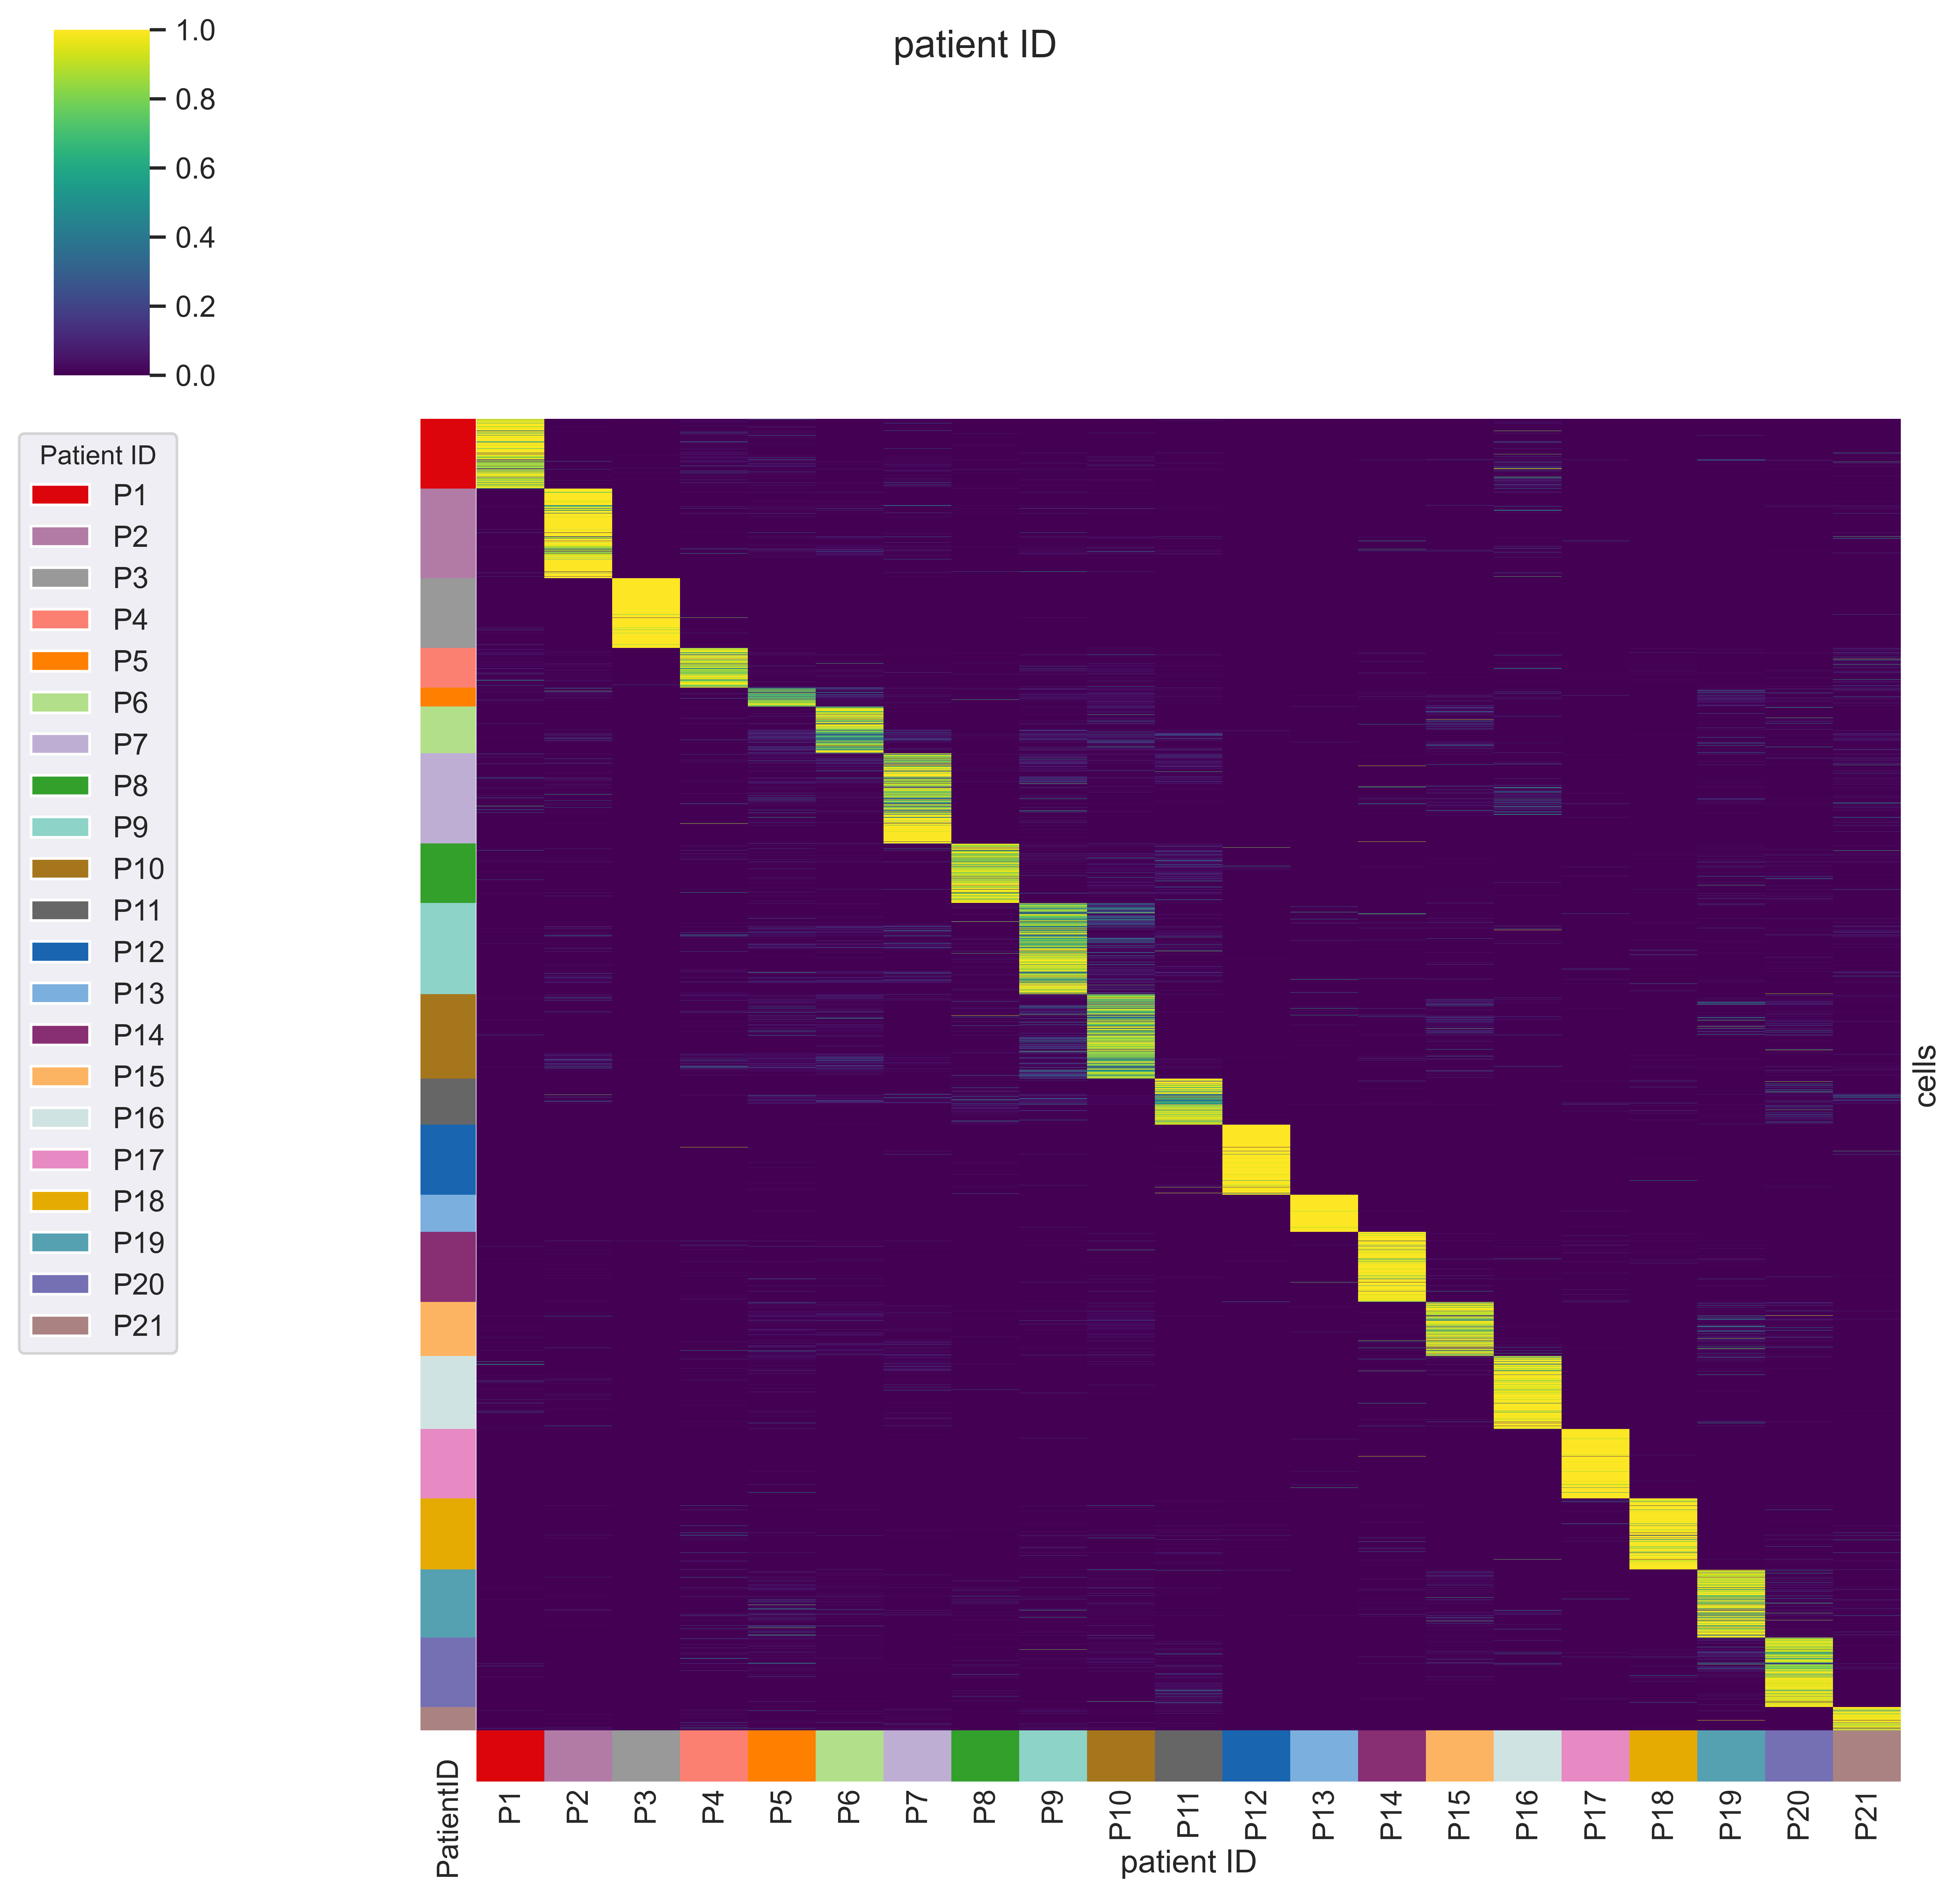

In [7]:
row_colors = cell_meta["PatientID"].map(id_cmap)
col_colors = patientID.columns.map(id_cmap)
g = sns.clustermap(patientID, cmap="viridis", row_cluster=False, col_cluster=False, xticklabels=True,
                  yticklabels=False, row_colors=row_colors, col_colors=col_colors)
g.fig.suptitle("patient ID")
g.ax_heatmap.set(xlabel='patient ID', ylabel='cells')
g.ax_heatmap.tick_params(right=False, pad=15)
handles = [Patch(facecolor=id_cmap[name]) for name in id_cmap.keys()]
l2=g.ax_heatmap.legend(loc='upper right',bbox_to_anchor=(-0.2,1), handles=handles, labels=id_cmap.keys())
l2.set_title(title='Patient ID',prop={'size':10})

# Move column annotation from top to bottom
ax_col_colors = g.ax_col_colors
box = ax_col_colors.get_position()
box_heatmap = g.ax_heatmap.get_position()
ax_col_colors.set_position([box_heatmap.min[0], box_heatmap.min[1]-box.height, box.width, box.height])


plt.savefig(f"{fig_dir}/markers_patientID_cells.png", bbox_inches="tight", dpi=300)
plt.savefig("/Users/adr/Box/iPC_AML/Documents/Manuscript/Figures/Figure1/myeloid_and_progenitor_markers_patientID_cells.png", bbox_inches="tight", dpi=300)
# plt.savefig(f"{fig_dir}/markers_patientID_cells.pdf", bbox_inches="tight")

# Marker space, blasts

In [8]:
blast_meta = pd.read_csv("/Users/adr/Box/iPC_work/Local_files_for_paper/Updated/svm_predicted_blasts_meta.csv",
                        index_col=0)
blast_meta["PatientID"] = [patient_to_id[p] for p in blast_meta["patient_id"]]
blasts_files = blast_meta[["file_id", "patient_id", "time_point"]].drop_duplicates().reset_index(drop=True)

In [9]:
# Load results from CCC
# A = np.load("Blasts/100_nearest_neighbours.npy")
fileID_classes = pd.read_csv("Blasts/file_id_classes_p.csv", index_col=0)
fileID = pd.read_csv("Blasts/file_id_post_p.csv", index_col=0)
# timepoint_classes = pd.read_csv("Blasts/time_point_classes_p.csv", index_col=0)
# timepoint = pd.read_csv("Blasts/time_point_post_p.csv", index_col=0)
patientID_classes = pd.read_csv("Blasts/patient_id_classes_p.csv", index_col=0)
patientID = pd.read_csv("Blasts/patient_id_post_p.csv", index_col=0)

In [10]:
# Make file ID numeric
fileID.columns = fileID.columns[:-2].astype("int64").append(fileID.columns[-2:])
fileID_classes.columns = fileID_classes.columns.astype("int64")

# Replace patient name by ID
patientID.columns = [patient_to_id[col] if col in patient_to_id.keys() else col for col in patientID.columns]
patientID["class"] = [patient_to_id[p] for p in patientID["class"]]

patientID_classes.columns = [patient_to_id[col] if col in patient_to_id.keys() else col for col in patientID_classes.columns]
patientID_classes.index = [patient_to_id[col] if col in patient_to_id.keys() else col for col in patientID_classes.index]

# Sort on patient ID
patientID_classes = patientID_classes.sort_index(key = lambda idx: [int(x.replace("P", "")) for x in idx])
patientID_classes = patientID_classes[patient_to_id.values()]

patientID = patientID.sort_values("class", key = lambda idx: [int(x.replace("P", "")) for x in idx])
patientID = patientID[patient_to_id.values()]




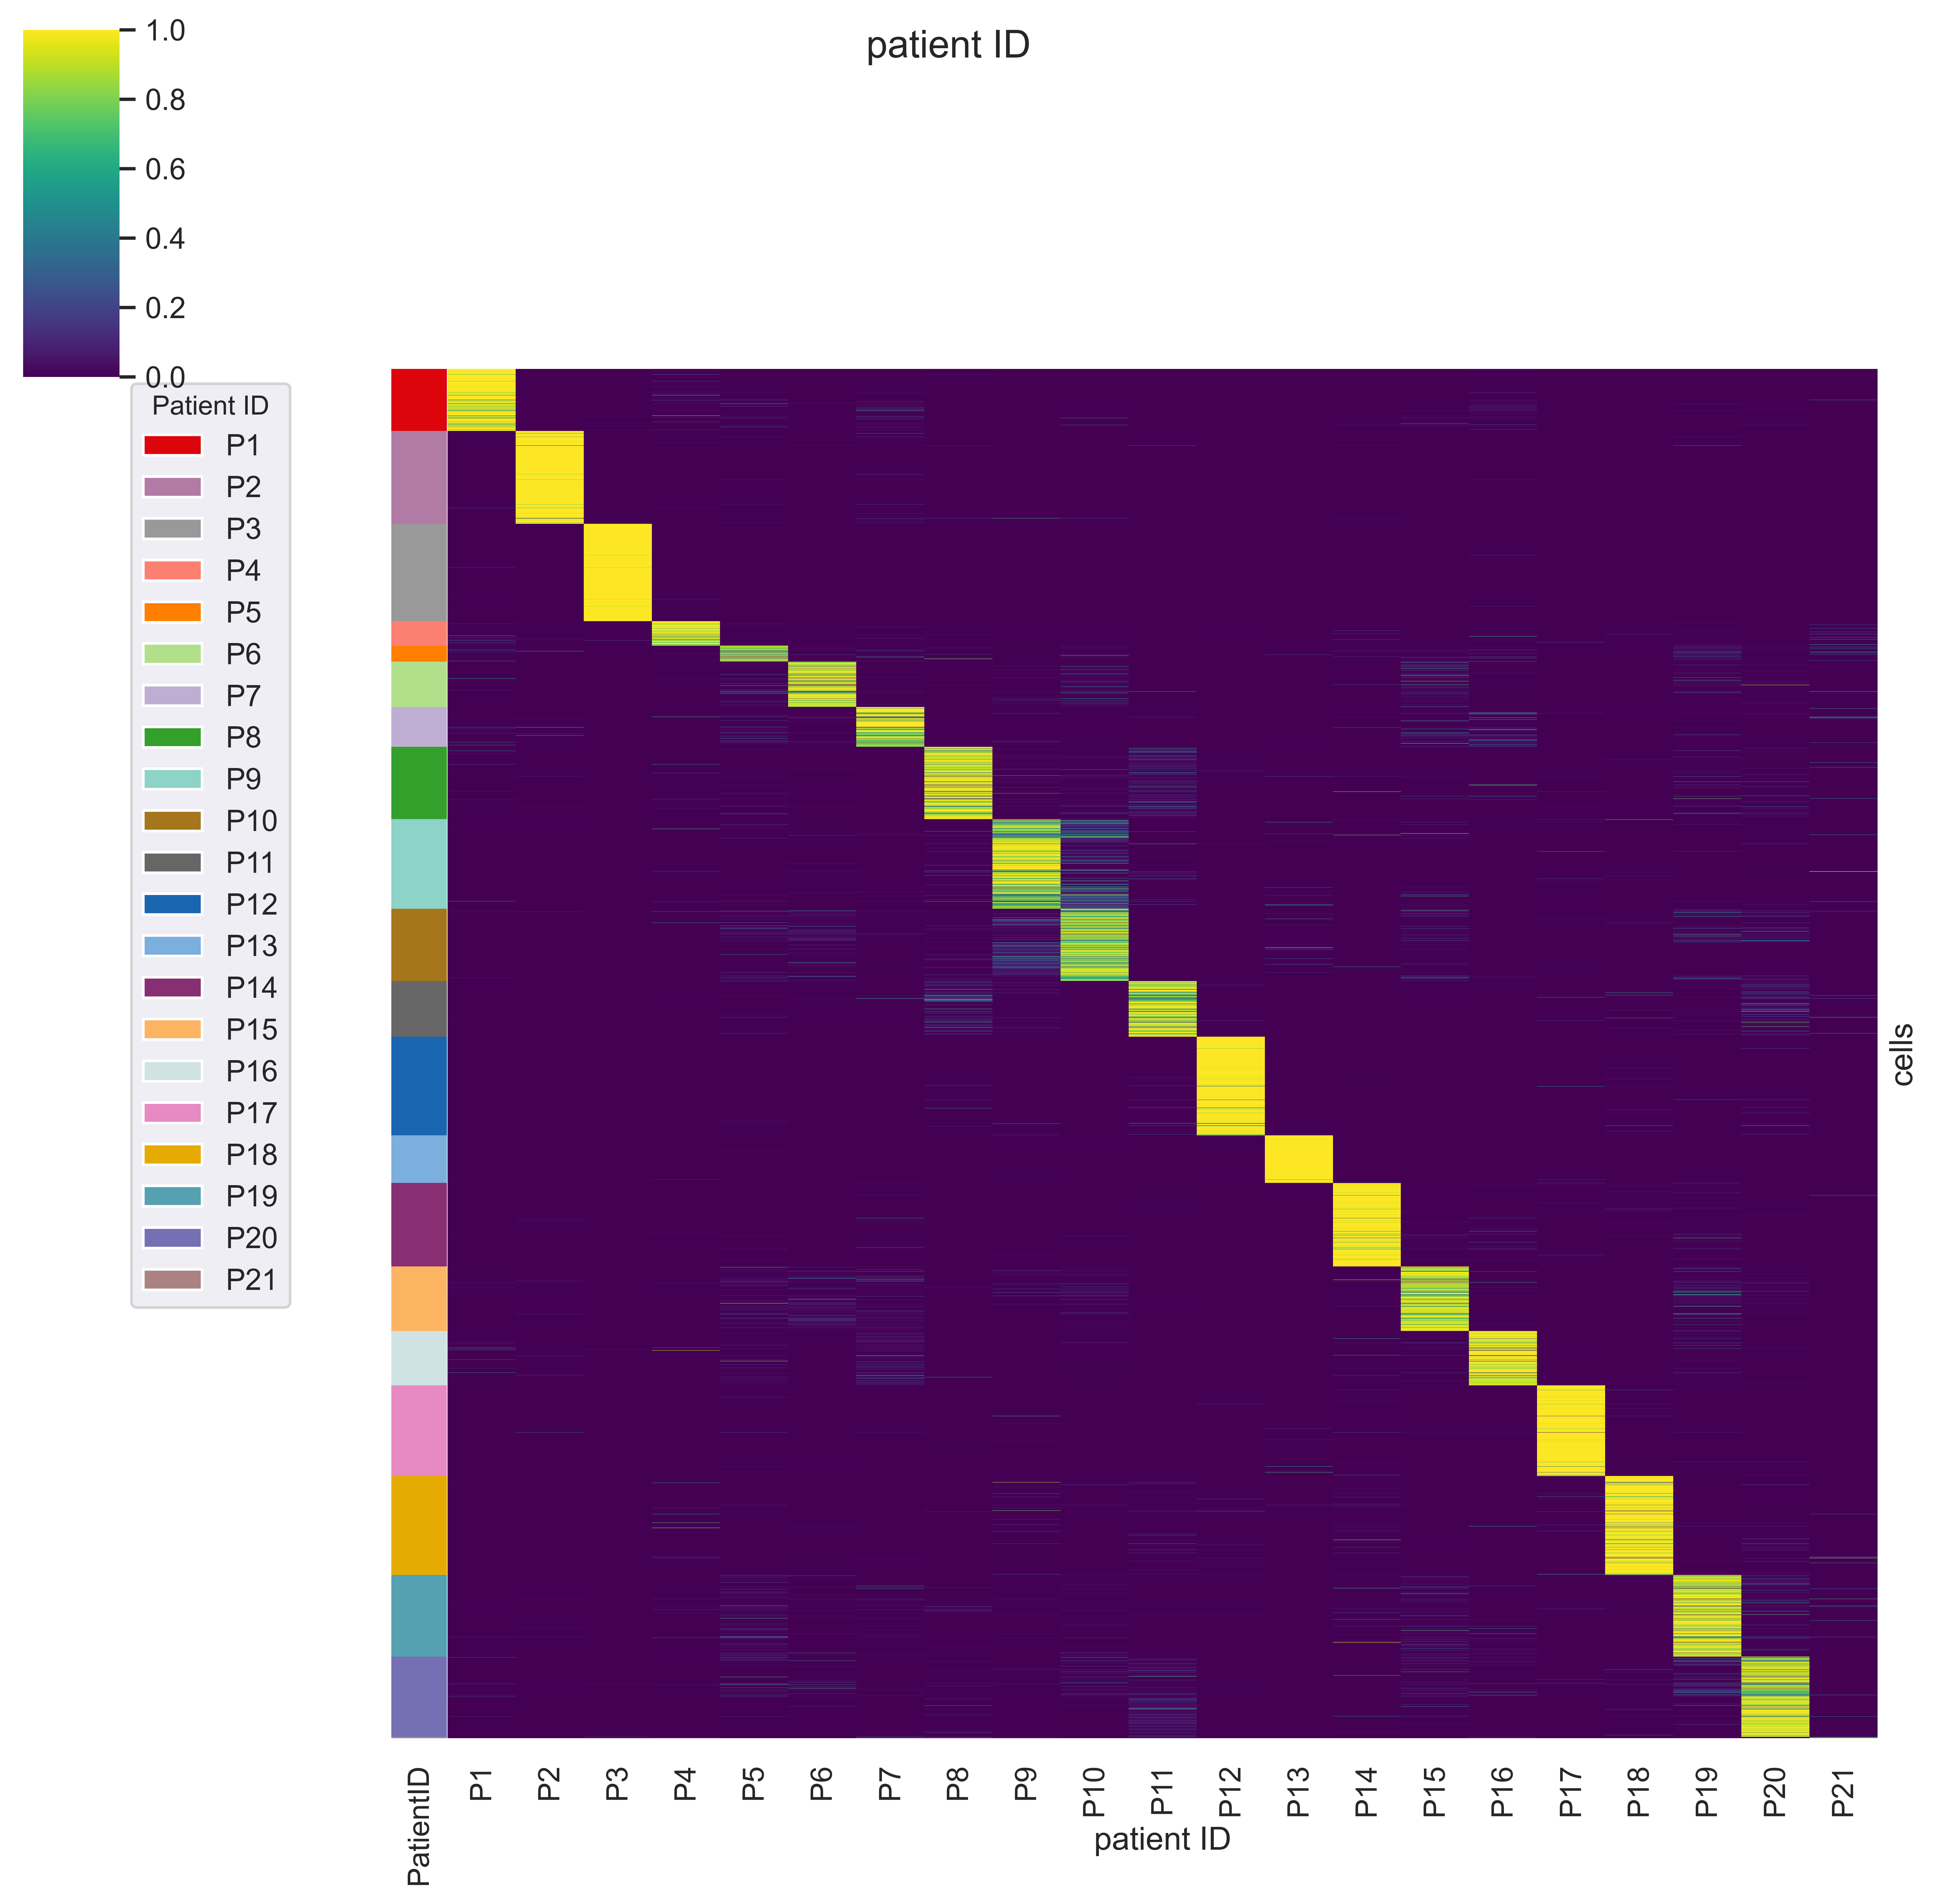

In [11]:
row_colors = blast_meta["PatientID"].map(id_cmap)
g = sns.clustermap(patientID, cmap="viridis", row_cluster=False, col_cluster=False, xticklabels=True,
                  yticklabels=False, row_colors=row_colors)
g.fig.suptitle("patient ID")
g.ax_heatmap.set(xlabel='patient ID', ylabel='cells')
g.ax_heatmap.tick_params(right=False)
handles = [Patch(facecolor=id_cmap[name]) for name in id_cmap.keys()]
l2=g.ax_heatmap.legend(loc='upper right',bbox_to_anchor=(-0.1,1), handles=handles, labels=id_cmap.keys())
l2.set_title(title='Patient ID',prop={'size':10})
plt.savefig(f"{fig_dir}/markers_predicted_blasts_patientID_cells.png", bbox_inches="tight")
# plt.savefig(f"{fig_dir}/markers_predicted_blasts_patientID_cells.pdf", bbox_inches="tight")

file ID


/var/folders/54/s3nhktxs0tz7w0f6tsj6pltc0000kp/T/ipykernel_1323/1162762068.py:20: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  temp = temp.drop(["PatientID", "time_point"], axis=1)


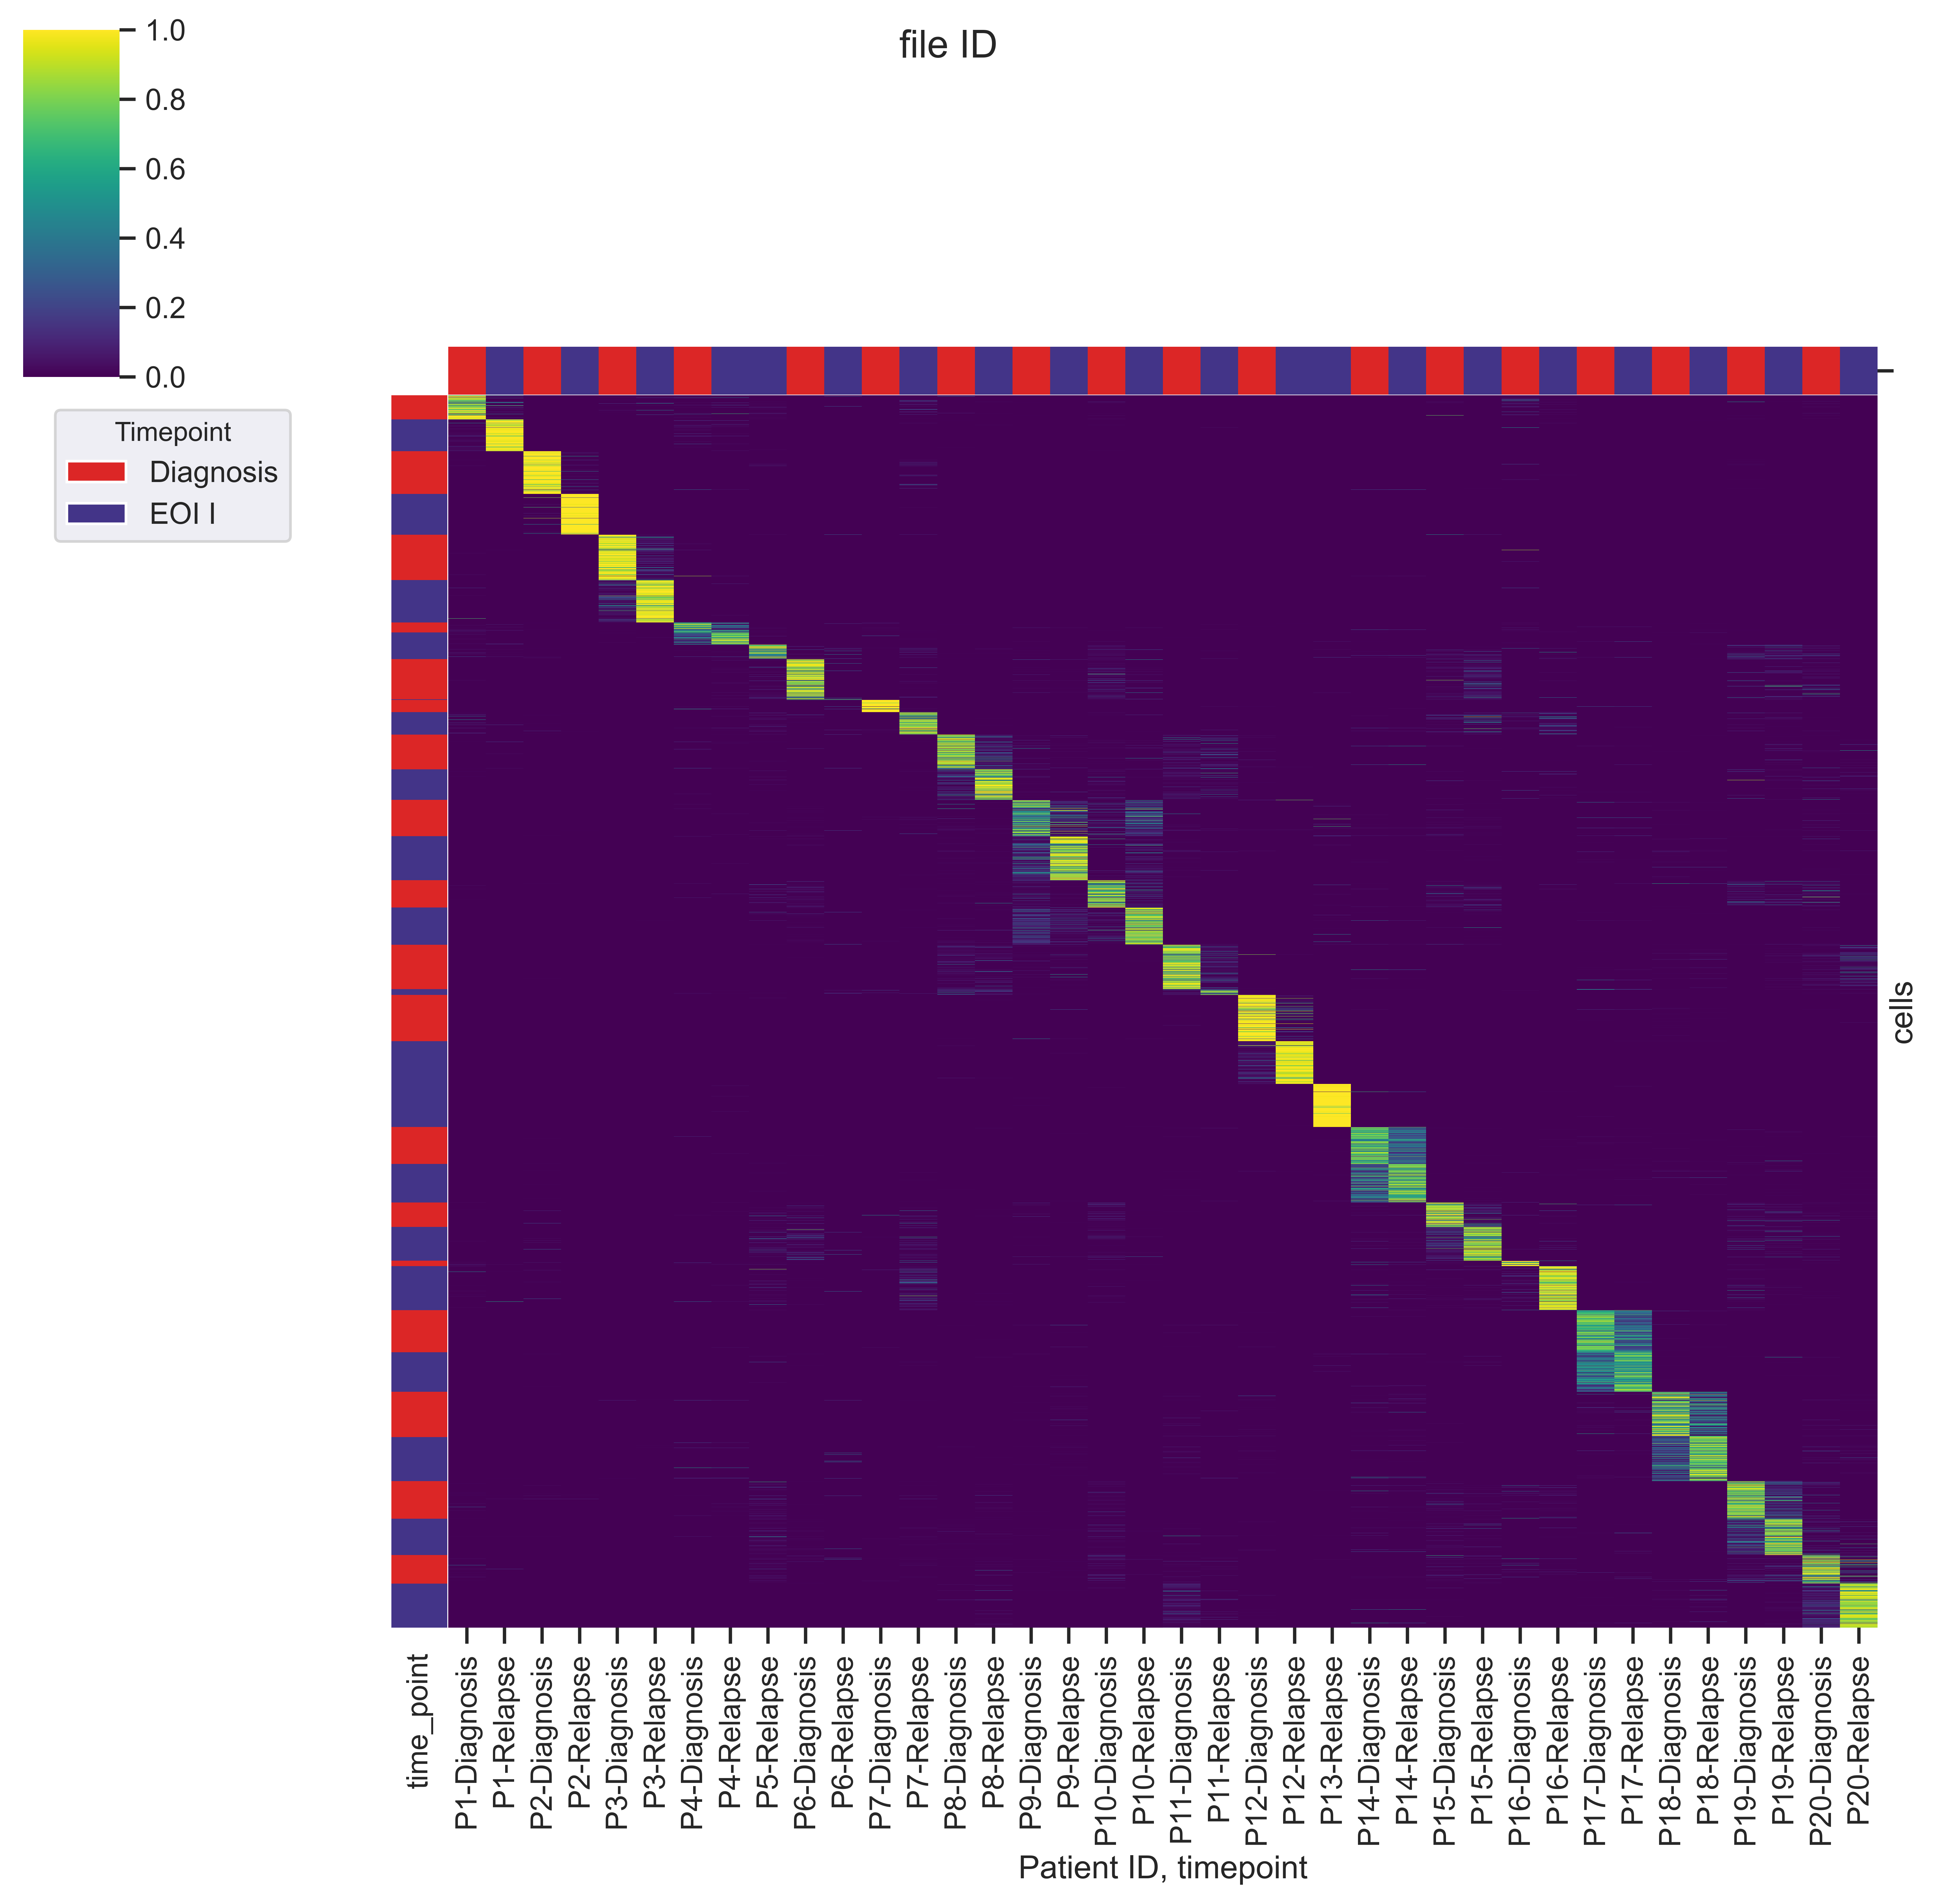

In [12]:
print("file ID")

# Select and order columns
temp = fileID.T.reset_index(drop=False).rename(columns={"index": "file_id"})
temp = temp.merge(blasts_files)
temp["PatientID"] = [patient_to_id[p] for p in temp["patient_id"]]
temp = temp[temp["time_point"]!="EOI I"]
temp = temp.sort_values(["PatientID", "time_point"],
                  key=lambda idx: [int(x.replace("P", "")) if idx.name=="PatientID"  else x for x in idx])
temp = temp.set_index(["PatientID", "time_point"], append=False)
temp = temp.drop(["patient_id", "file_id"], axis=1)
temp = temp.T

# Select and order rows
temp[["PatientID", "time_point"]] = blast_meta[["PatientID", "time_point"]]
temp = temp.loc[temp["time_point"]!="EOI I"]
temp = temp.sort_values(["PatientID", "time_point"],
                  key=lambda idx: [int(x.replace("P", "")) if idx.name=="PatientID"  else x for x in idx])
row_meta = temp.loc[:,["PatientID", "time_point"]]
temp = temp.drop(["PatientID", "time_point"], axis=1)


row_colors = row_meta["time_point"].map(timepoints_cmap)
col_colors = pd.Series([c[1] for c in temp.columns], index=temp.columns).map(timepoints_cmap)

g = sns.clustermap(temp, cmap="viridis", row_cluster=False, col_cluster=False, 
                   row_colors=row_colors, col_colors = col_colors, xticklabels=True,
                  yticklabels=False)
g.fig.suptitle("file ID")
g.ax_heatmap.set(xlabel='Patient ID, timepoint', ylabel='cells')
handles = [Patch(facecolor=timepoints_cmap[name]) for name in blasts_files["time_point"].unique() if not name=="EOI I"]
l2=g.ax_heatmap.legend(loc='upper right',bbox_to_anchor=(-0.1,1), handles=handles, labels=timepoints_cmap.keys())
l2.set_title(title='Timepoint',prop={'size':10})
g.ax_heatmap.tick_params(right=False, bottom=True)
plt.savefig(f"{fig_dir}/markers_predicted_blasts_fileID_cells.png", bbox_inches="tight")
plt.savefig(f"/Users/adr/Box/iPC_AML/Documents/Manuscript/Figures/Figure3/markers_predicted_blasts_fileID_cells.png", bbox_inches="tight")
# plt.savefig(f"{fig_dir}/markers_predicted_blasts_fileID_cells.pdf", bbox_inches="tight")

# Latent space - blasts

In [13]:
pred = np.load("/Users/adr/Box/iPC_work/Local_files_for_paper/Model/Experiments/sklear_models/LCO/L1O/svm_prediction.npy")
blast_meta = cell_meta[pred=="Blast"].reset_index(drop=True)
blasts_files = blast_meta[["file_id", "patient_id", "time_point"]].drop_duplicates().reset_index(drop=True)

In [14]:
# Load results from CCC
# A = np.load("Latent_space/Blasts/100_nearest_neighbours.npy")
fileID_classes = pd.read_csv("Latent_space/Blasts/file_id_classes_p.csv", index_col=0)
fileID = pd.read_csv("Latent_space/Blasts/file_id_post_p.csv", index_col=0)
# timepoint_classes = pd.read_csv("Latent_space/Blasts/time_point_classes_p.csv", index_col=0)
# timepoint = pd.read_csv("Latent_space/Blasts/time_point_post_p.csv", index_col=0)
patientID_classes = pd.read_csv("Latent_space/Blasts/patient_id_classes_p.csv", index_col=0)
patientID = pd.read_csv("Latent_space/Blasts/patient_id_post_p.csv", index_col=0)
clusterID_classes = pd.read_csv("Latent_space/Blasts/cluster_id_classes_p.csv", index_col=0)
clusterID = pd.read_csv("Latent_space/Blasts/cluster_id_post_p.csv", index_col=0)
celltype = pd.read_csv("Latent_space/Blasts/cell_type_post_p.csv", index_col=0)
celltype_classes = pd.read_csv("Latent_space/Blasts/cell_type_classes_p.csv", index_col=0)

In [15]:
# Make file ID numeric
fileID.columns = fileID.columns[:-2].astype("int64").append(fileID.columns[-2:])
fileID_classes.columns = fileID_classes.columns.astype("int64")

# Replace patient name by ID
patientID.columns = [patient_to_id[col] if col in patient_to_id.keys() else col for col in patientID.columns]
patientID["class"] = [patient_to_id[p] for p in patientID["class"]]

patientID_classes.columns = [patient_to_id[col] if col in patient_to_id.keys() else col for col in patientID_classes.columns]
patientID_classes.index = [patient_to_id[col] if col in patient_to_id.keys() else col for col in patientID_classes.index]

# Sort on patient ID
patientID_classes = patientID_classes.sort_index(key = lambda idx: [int(x.replace("P", "")) for x in idx])
patientID_classes = patientID_classes[patient_to_id.values()]

patientID = patientID.sort_values("class", key = lambda idx: [int(x.replace("P", "")) for x in idx])
patientID = patientID[patient_to_id.values()]




/var/folders/54/s3nhktxs0tz7w0f6tsj6pltc0000kp/T/ipykernel_1323/62939611.py:20: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  temp = temp.drop(["PatientID", "time_point"], axis=1)


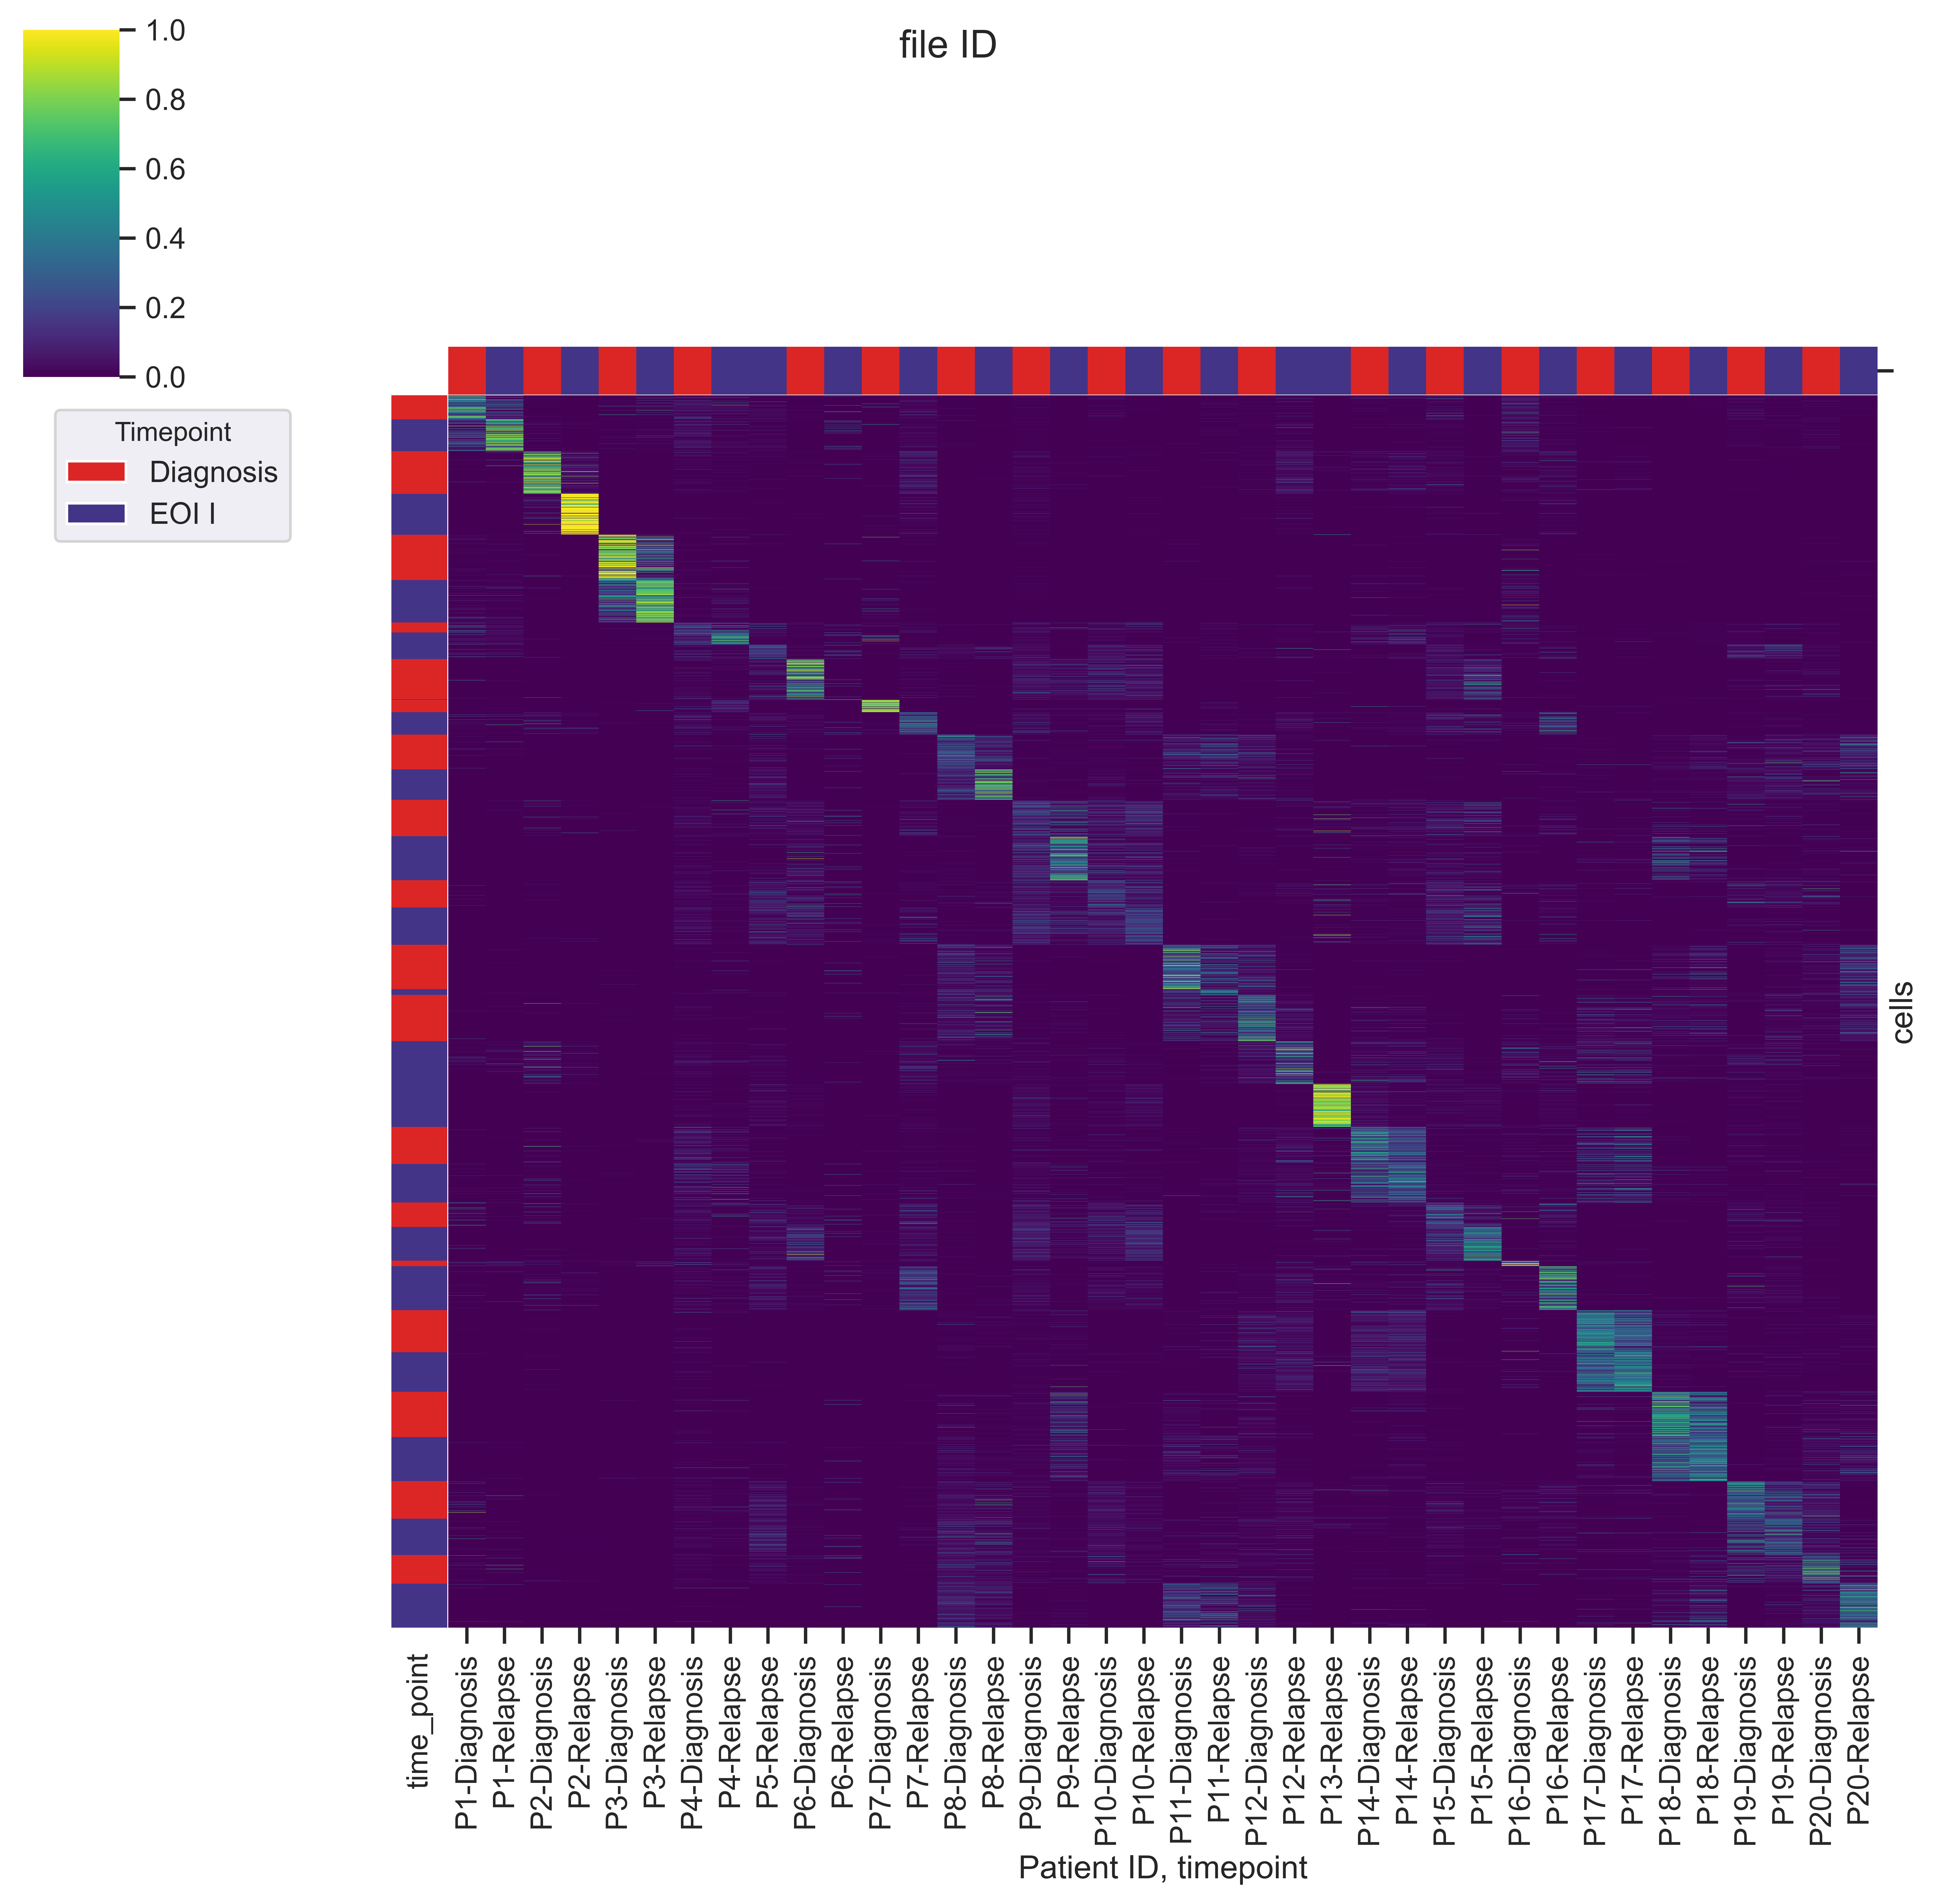

In [16]:
# print("file ID")

# Select and order columns
temp = fileID.T.reset_index(drop=False).rename(columns={"index": "file_id"})
temp = temp.merge(blasts_files)
temp["PatientID"] = [patient_to_id[p] for p in temp["patient_id"]]
temp = temp[temp["time_point"]!="EOI I"]
temp = temp.sort_values(["PatientID", "time_point"],
                  key=lambda idx: [int(x.replace("P", "")) if idx.name=="PatientID"  else x for x in idx])
temp = temp.set_index(["PatientID", "time_point"], append=False)
temp = temp.drop(["patient_id", "file_id"], axis=1)
temp = temp.T

# Select and order rows
temp[["PatientID", "time_point"]] = blast_meta[["PatientID", "time_point"]]
temp = temp.loc[temp["time_point"]!="EOI I"]
temp = temp.sort_values(["PatientID", "time_point"],
                  key=lambda idx: [int(x.replace("P", "")) if idx.name=="PatientID"  else x for x in idx])
row_meta = temp.loc[:,["PatientID", "time_point"]]
temp = temp.drop(["PatientID", "time_point"], axis=1)

row_colors = row_meta["time_point"].map(timepoints_cmap)
col_colors = pd.Series([c[1] for c in temp.columns], index=temp.columns).map(timepoints_cmap)

g = sns.clustermap(temp, cmap="viridis", row_cluster=False, col_cluster=False, 
                   row_colors=row_colors, col_colors = col_colors, xticklabels=True,
                  yticklabels=False)
g.fig.suptitle("file ID")
g.ax_heatmap.set(xlabel='Patient ID, timepoint', ylabel='cells')
handles = [Patch(facecolor=timepoints_cmap[name]) for name in blasts_files["time_point"].unique() if not name=="EOI I"]
l2=g.ax_heatmap.legend(loc='upper right',bbox_to_anchor=(-0.1,1), handles=handles, labels=timepoints_cmap.keys())
l2.set_title(title='Timepoint',prop={'size':10})
g.ax_heatmap.tick_params(right=False, bottom=True)
plt.savefig(f"{fig_dir}/latent_blasts_fileID_cells.png", bbox_inches="tight")
plt.savefig(f"/Users/adr/Box/iPC_AML/Documents/Manuscript/Figures/Figure3/latent_space_predicted_blasts_fileID_cells.png", bbox_inches="tight")
# plt.savefig(f"{fig_dir}/latent_blasts_fileID_cells.pdf", bbox_inches="tight")

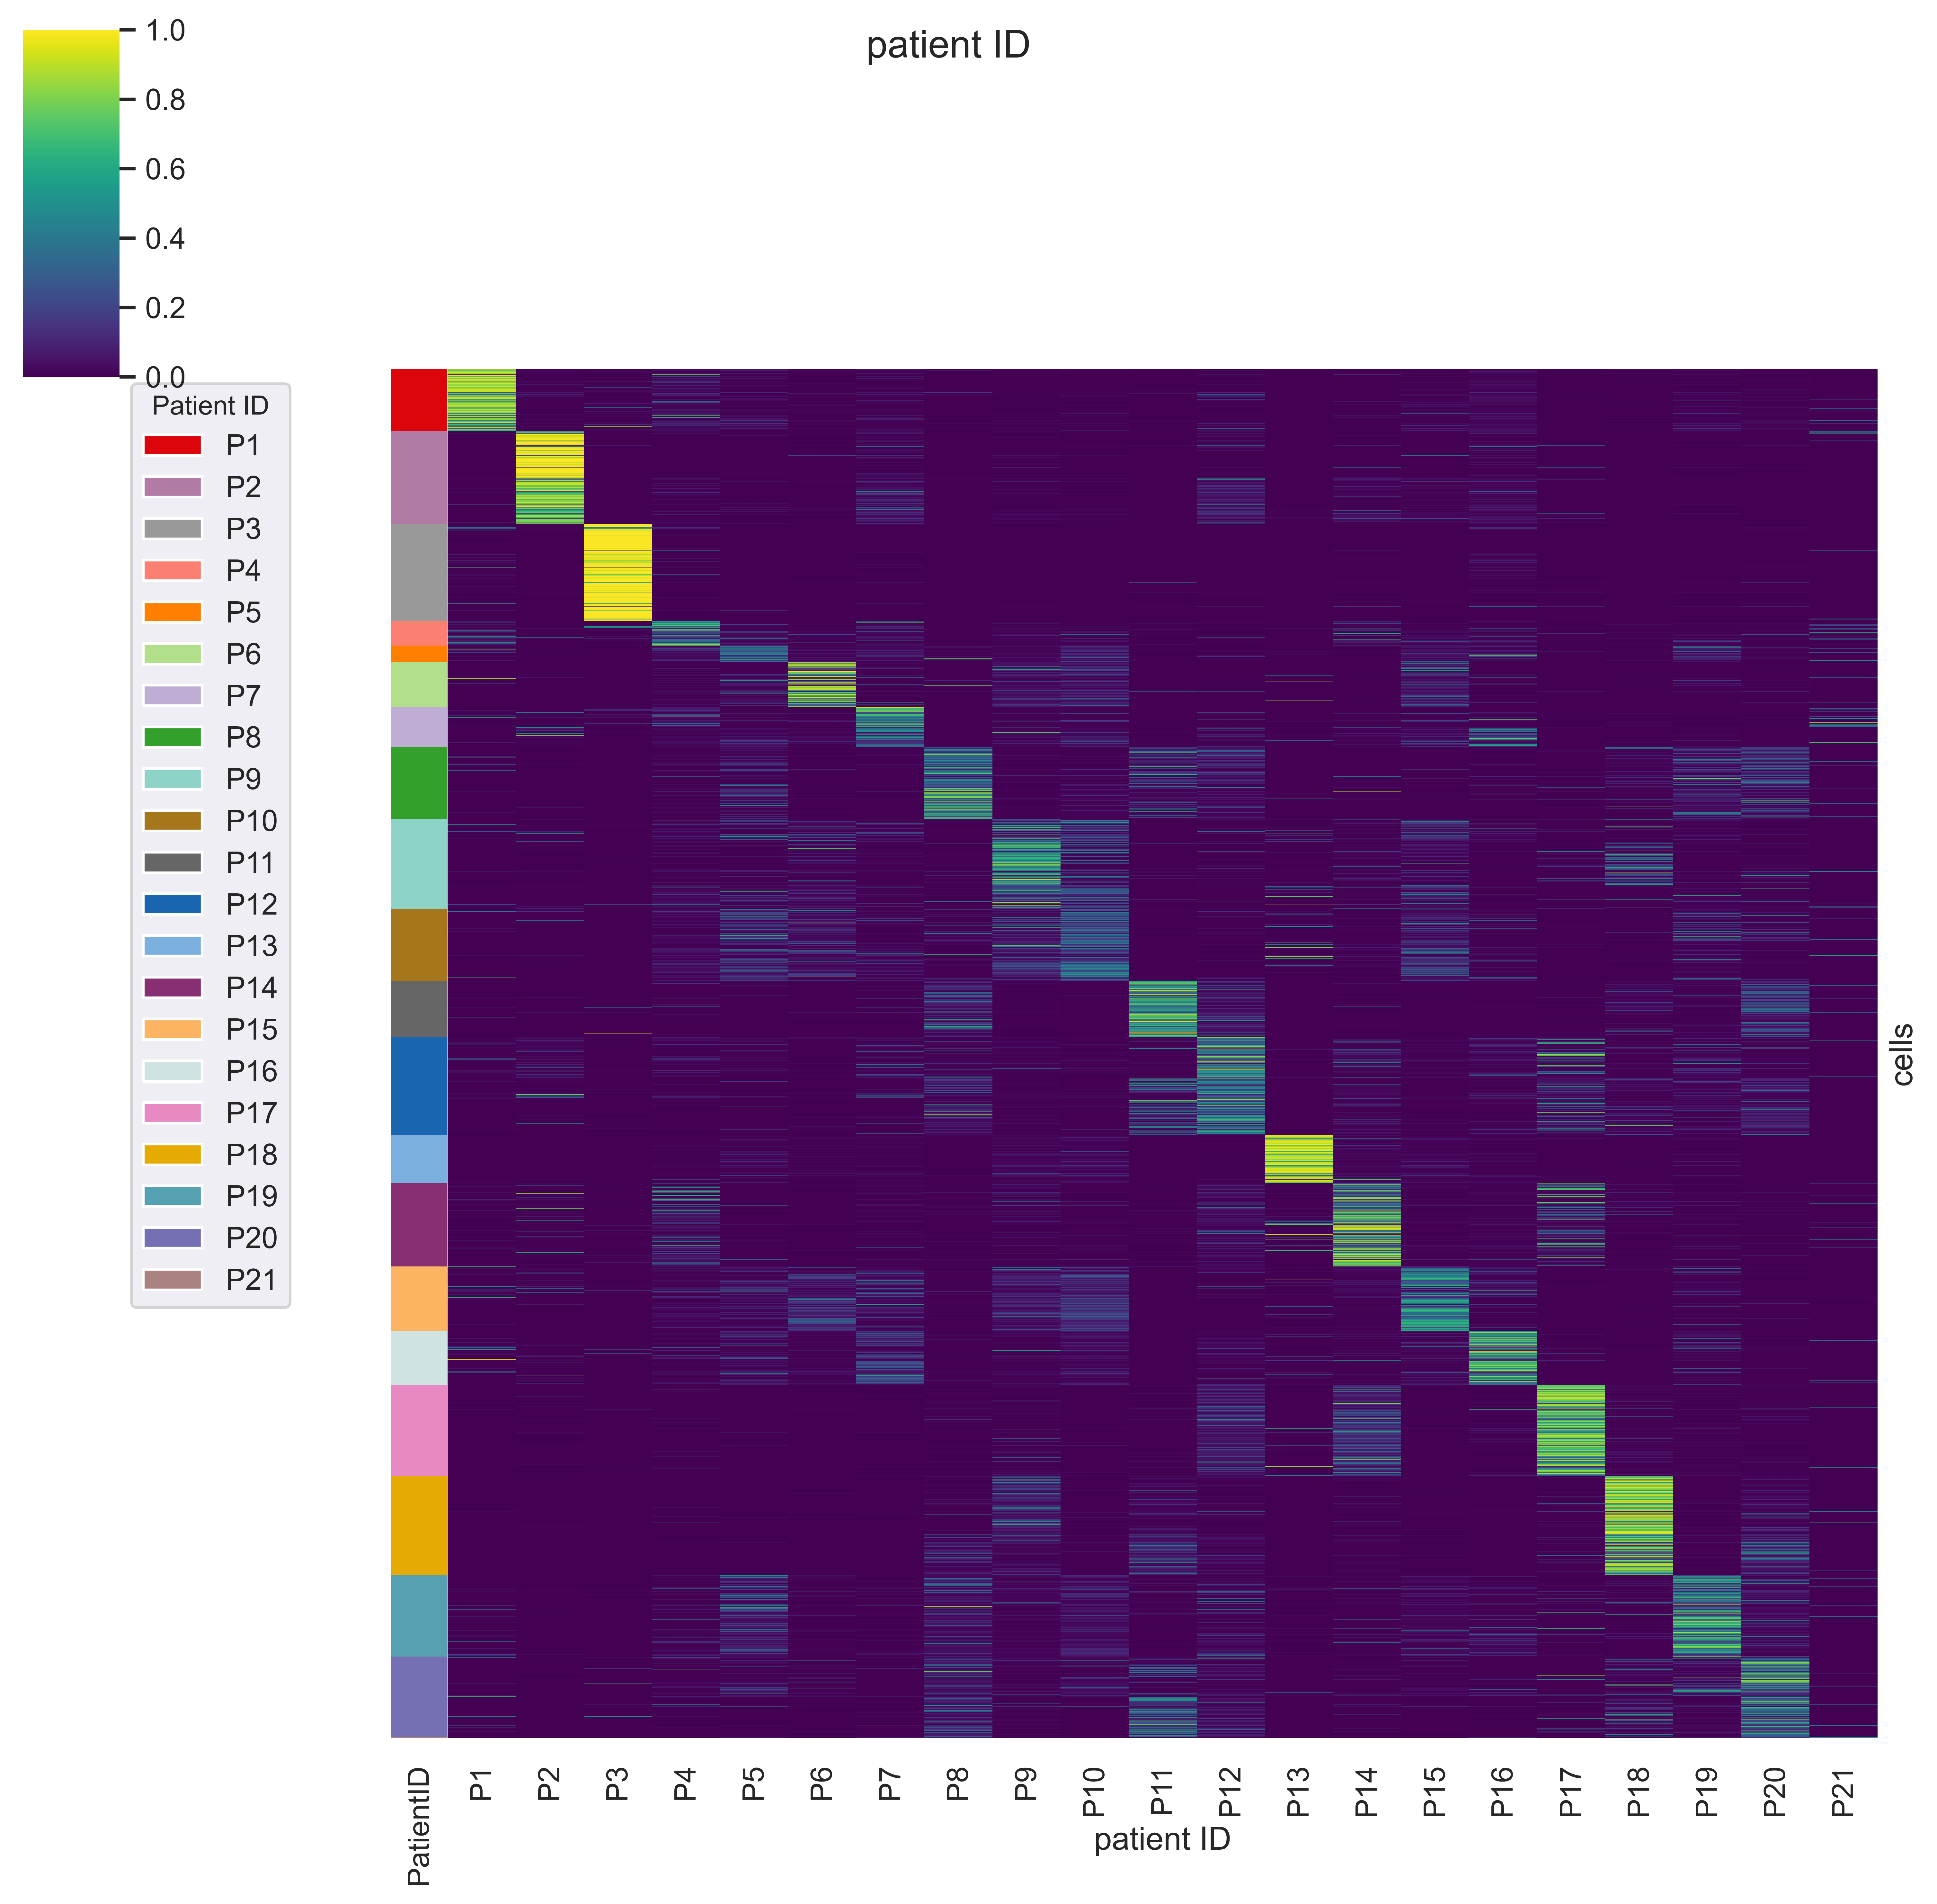

In [17]:
row_colors = blast_meta["PatientID"].map(id_cmap)
g = sns.clustermap(patientID, cmap="viridis", row_cluster=False, col_cluster=False, xticklabels=True,
                  yticklabels=False, row_colors=row_colors)
g.fig.suptitle("patient ID")
g.ax_heatmap.set(xlabel='patient ID', ylabel='cells')
g.ax_heatmap.tick_params(right=False)
handles = [Patch(facecolor=id_cmap[name]) for name in id_cmap.keys()]
l2=g.ax_heatmap.legend(loc='upper right',bbox_to_anchor=(-0.1,1), handles=handles, labels=id_cmap.keys())
l2.set_title(title='Patient ID',prop={'size':10})
plt.savefig(f"{fig_dir}/latent_blasts_patientID_cells.png", bbox_inches="tight")
# plt.savefig(f"{fig_dir}/latent_blasts_patientID_cells.pdf", bbox_inches="tight")

# NonMyeloid cells

## K100 - like markers and latent space

In [45]:
meta = pd.read_csv("/Users/adr/Box/iPC_work/Local_files_for_paper/Updated/NonMyeloid/non_myeloid_meta.csv",
                  index_col=0)
meta["PatientID"] = [patient_to_id[p] for p in meta["patient_id"]]
file_m = meta[["file_id", "patient_id", "time_point", "PatientID"]].drop_duplicates().reset_index(drop=True)

In [42]:
# Load results from CCC
# A = np.load("NonMyeloid/k100/100_nearest_neighbours.npy")
# fileID_classes = pd.read_csv("NonMyeloid/k100/file_id_classes_p.csv", index_col=0)
# fileID = pd.read_csv("NonMyeloid/k100/file_id_post_p.csv", index_col=0)
# timepoint_classes = pd.read_csv("NonMyeloid/k100/time_point_classes_p.csv", index_col=0)
# timepoint = pd.read_csv("NonMyeloid/k100/time_point_post_p.csv", index_col=0)
# patientID_classes = pd.read_csv("NonMyeloid/k100/patient_id_classes_p.csv", index_col=0)
patientID = pd.read_csv("NonMyeloid/k100/patient_id_post_p.csv", index_col=0)
# celltype = pd.read_csv("NonMyeloid/k100/cell_type_post_p.csv", index_col=0)
# celltype_classes = pd.read_csv("NonMyeloid/k100/cell_type_classes_p.csv", index_col=0)

In [43]:
patientID

PAUMTZ    PAUZTH    PAUZVP  PAVDZK    PAVEDT    PAVRJP    PAVSFB  \
0      0.859223  0.000000  0.000000     0.0  0.010854  0.000000  0.002916   
1      0.434878  0.000000  0.000000     0.0  0.000000  0.017299  0.010651   
2      0.769965  0.000000  0.000000     0.0  0.000000  0.003202  0.003943   
3      0.800261  0.000000  0.000000     0.0  0.000000  0.000000  0.009016   
4      0.994973  0.000000  0.000000     0.0  0.000000  0.000000  0.000000   
...         ...       ...       ...     ...       ...       ...       ...   
79745  0.082005  0.007994  0.085463     0.0  0.085981  0.012504  0.000000   
79746  0.028498  0.016668  0.118798     0.0  0.029879  0.052145  0.000000   
79747  0.000000  0.025880  0.026350     0.0  0.106039  0.023132  0.007121   
79748  0.025464  0.014894  0.132688     0.0  0.000000  0.040769  0.028687   
79749  0.000000  0.041384  0.000000     0.0  0.080931  0.023540  0.000000   

         PAVTDU    PAVTLN    PAVZEC  ...    PAWWEE    PAWWZL    PAWXIA  \
0      0.000000  0.000000  0.000000  ...  0.005051  0.000000  0.000000   
1      0.170973  0.000000  0.000000  ...  0.004613  0.049368  0.000000   
2      0.021098  0.000000  0.000000  ...  0.064891  0.007833  0.000000   
3      0.160807  0.000000  0.000000  ...  0.019523  0.000000  0.000000   
4      0.002550  0.000000  0.000000  ...  0.002477  0.000000  0.000000   
...         ...       ...       ...  ...       ...       ...       ...   
79745  0.020598  0.069544  0.000000  ...  0.026675  0.203918  0.000000   
79746  0.007158  0.000000  0.000000  ...  0.041714  0.026574  0.000000   
79747  0.000000  0.064325  0.047002  ...  0.055515  0.028292  0.034374   
79748  0.000000  0.000000  0.165678  ...  0.074547  0.018996  0.000000   
79749  0.006463  0.065459  0.071745  ...  0.031385  0.086373  0.069960   

         PAWZZN    PAXJXC    PAXMIJ    PAXMLI  TEST12378  pred_class  \
0      0.000000  0.002410  0.000000  0.115712   0.003834      PAUMTZ   
1      0.000000  0.017610  0.000000  0.288197   0.000000      PAUMTZ   
2      0.000000  0.019558  0.000000  0.099578   0.005185      PAUMTZ   
3      0.000000  0.007453  0.000000  0.000000   0.000000      PAUMTZ   
4      0.000000  0.000000  0.000000  0.000000   0.000000      PAUMTZ   
...         ...       ...       ...       ...        ...         ...   
79745  0.025459  0.101835  0.000000  0.111107   0.151854      PAWWZL   
79746  0.000000  0.086260  0.030785  0.144790   0.158312   TEST12378   
79747  0.000000  0.023548  0.018209  0.025692   0.421376   TEST12378   
79748  0.000000  0.041503  0.045846  0.000000   0.282917   TEST12378   
79749  0.000000  0.035945  0.013897  0.156870   0.209636   TEST12378   

           class  
0         PAUMTZ  
1         PAUMTZ  
2         PAUMTZ  
3         PAUMTZ  
4         PAUMTZ  
...          ...  
79745  TEST12378  
79746  TEST12378  
79747  TEST12378  
79748  TEST12378  
79749  TEST12378  

[79750 rows x 23 columns]

In [46]:
meta

file_id patient_id time_point cell_type PatientID
0            0     PAUMTZ  Diagnosis  Basophil        P1
1            0     PAUMTZ  Diagnosis  Basophil        P1
2            0     PAUMTZ  Diagnosis  Basophil        P1
3            0     PAUMTZ  Diagnosis  Basophil        P1
4            0     PAUMTZ  Diagnosis  Basophil        P1
...        ...        ...        ...       ...       ...
79745       42  TEST12378      EOI I    T_cell       P21
79746       42  TEST12378      EOI I    T_cell       P21
79747       42  TEST12378      EOI I    T_cell       P21
79748       42  TEST12378      EOI I    T_cell       P21
79749       42  TEST12378      EOI I    T_cell       P21

[79750 rows x 5 columns]

In [47]:
# Make file ID numeric
# fileID.columns = fileID.columns[:-2].astype("int64").append(fileID.columns[-2:])
# fileID_classes.columns = fileID_classes.columns.astype("int64")

# Replace patient name by ID
patientID.columns = [patient_to_id[col] if col in patient_to_id.keys() else col for col in patientID.columns]
patientID["class"] = [patient_to_id[p] for p in patientID["class"]]

patientID_classes.columns = [patient_to_id[col] if col in patient_to_id.keys() else col for col in patientID_classes.columns]
patientID_classes.index = [patient_to_id[col] if col in patient_to_id.keys() else col for col in patientID_classes.index]

# Sort on patient ID
# patientID_classes = patientID_classes.sort_index(key = lambda idx: [int(x.replace("P", "")) for x in idx])
# patientID_classes = patientID_classes[patient_to_id.values()]

patientID = patientID.sort_values("class", key = lambda idx: [int(x.replace("P", "")) for x in idx])
patientID = patientID[patient_to_id.values()]

meta = meta.sort_values("PatientID", key = lambda idx: [int(x.replace("P", "")) for x in idx])


In [48]:
patientID

P1        P2        P3        P4        P5        P6        P7  \
0      0.859223  0.000000  0.115712  0.000000  0.002916  0.000000  0.002410   
8591   0.043583  0.019937  0.000000  0.101964  0.110473  0.224143  0.000000   
8592   0.022423  0.005129  0.296201  0.101639  0.012630  0.041185  0.010442   
8593   0.133047  0.000000  0.000000  0.012970  0.062453  0.187355  0.000000   
8594   0.224177  0.037290  0.082836  0.068540  0.022959  0.067379  0.004745   
...         ...       ...       ...       ...       ...       ...       ...   
30103  0.040163  0.055118  0.000000  0.070474  0.090495  0.007377  0.000000   
30104  0.000000  0.054522  0.000000  0.058094  0.123086  0.240814  0.000000   
30105  0.000000  0.008043  0.000000  0.035993  0.257503  0.012918  0.000000   
30093  0.000000  0.026024  0.000000  0.011091  0.160226  0.034831  0.000000   
79749  0.000000  0.023540  0.156870  0.041384  0.000000  0.056711  0.035945   

             P8        P9       P10  ...       P12  P13       P14       P15  \
0      0.000000  0.005051  0.000000  ...  0.000000  0.0  0.010854  0.000000   
8591   0.044341  0.010633  0.203202  ...  0.000000  0.0  0.000000  0.000000   
8592   0.098855  0.005470  0.037636  ...  0.046736  0.0  0.000000  0.005632   
8593   0.000000  0.000000  0.487988  ...  0.000000  0.0  0.000000  0.000000   
8594   0.013823  0.000000  0.003801  ...  0.000000  0.0  0.021368  0.000000   
...         ...       ...       ...  ...       ...  ...       ...       ...   
30103  0.013621  0.166573  0.149808  ...  0.000000  0.0  0.000000  0.000000   
30104  0.148210  0.000000  0.000000  ...  0.000000  0.0  0.000000  0.000000   
30105  0.023851  0.025737  0.019674  ...  0.000000  0.0  0.000000  0.000000   
30093  0.064310  0.157295  0.070732  ...  0.000000  0.0  0.000000  0.000000   
79749  0.008726  0.031385  0.086373  ...  0.000000  0.0  0.080931  0.006463   

            P16       P17       P18       P19       P20       P21  
0      0.000000  0.000000  0.000000  0.000000  0.000000  0.003834  
8591   0.000000  0.000000  0.000000  0.138822  0.000000  0.032282  
8592   0.228182  0.020841  0.000000  0.017855  0.020883  0.000000  
8593   0.000000  0.000000  0.060294  0.000000  0.000000  0.000000  
8594   0.259242  0.018943  0.027707  0.016229  0.075923  0.000000  
...         ...       ...       ...       ...       ...       ...  
30103  0.000000  0.000000  0.000000  0.000000  0.000000  0.312366  
30104  0.000000  0.000000  0.054014  0.000000  0.000000  0.235423  
30105  0.000000  0.000000  0.095615  0.084007  0.000000  0.221396  
30093  0.000000  0.000000  0.051562  0.000000  0.000000  0.266875  
79749  0.065459  0.071745  0.069960  0.040978  0.000000  0.209636  

[79750 rows x 21 columns]

In [21]:
# fileID[["PatientID", "time_point", "cell_type"]] = meta[["PatientID", "time_point", "cell_type"]]
# fileID.sort_values(["PatientID", "time_point"], inplace=True, key = lambda idx: [int(x.replace("P", "")) if x.startswith("P") else x for x in idx])
# fileID.drop(["PatientID", "time_point"], axis=1, inplace=True)

# timepoint[["PatientID", "time_point", "cell_type"]] = meta[["PatientID", "time_point", "cell_type"]]
# timepoint.sort_values(["PatientID"], inplace=True,  key = lambda idx: [int(x.replace("P", ""))  for x in idx])
# # timepoint.drop(["patient_id", "time_point"], axis=1, inplace=True)

# celltype[["PatientID", "time_point", "cell_type"]] = meta[["PatientID", "time_point", "cell_type"]]
# celltype.sort_values("cell_type", inplace=True)

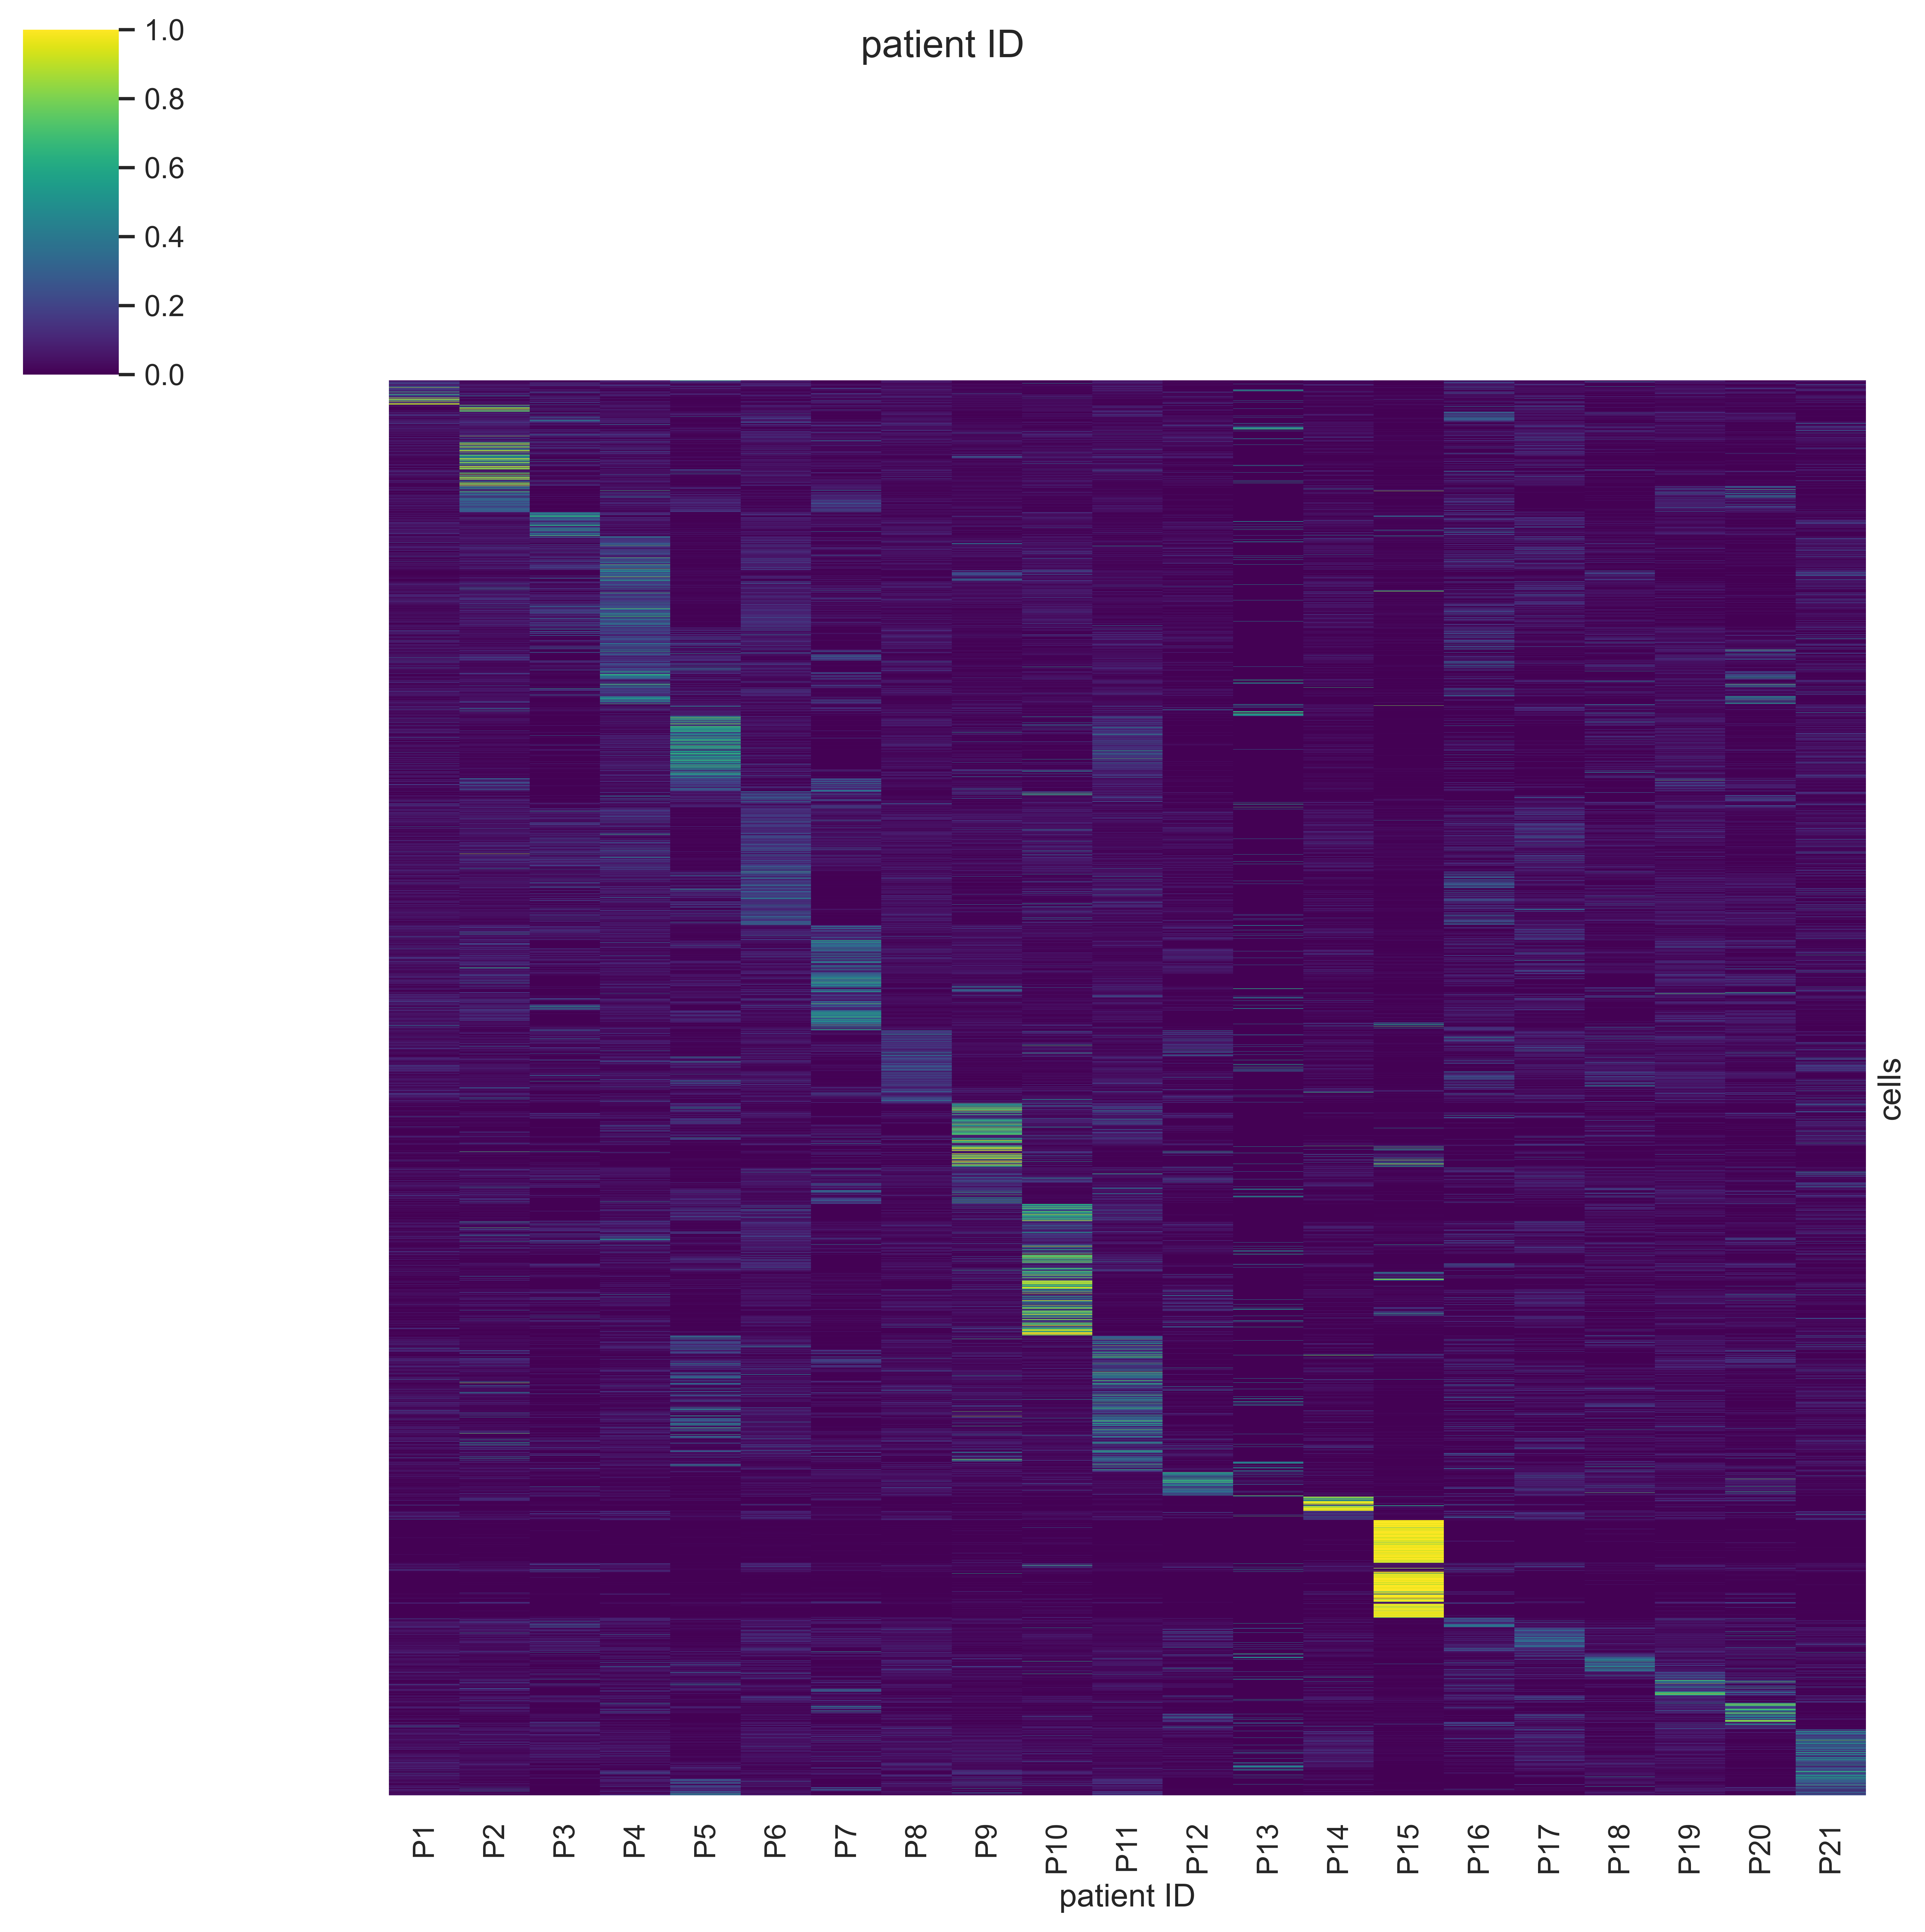

In [22]:
g = sns.clustermap(patientID, cmap="viridis", row_cluster=False, col_cluster=False, xticklabels=True,
                  yticklabels=False)
g.fig.suptitle("patient ID")
g.ax_heatmap.set(xlabel='patient ID', ylabel='cells')
g.ax_heatmap.tick_params(right=False)
plt.savefig(f"{fig_dir}/NonMyeloid_patientID_cells.png", bbox_inches="tight")
# plt.savefig(f"{fig_dir}/NonMyeloid_patientID_cells.pdf", bbox_inches="tight")

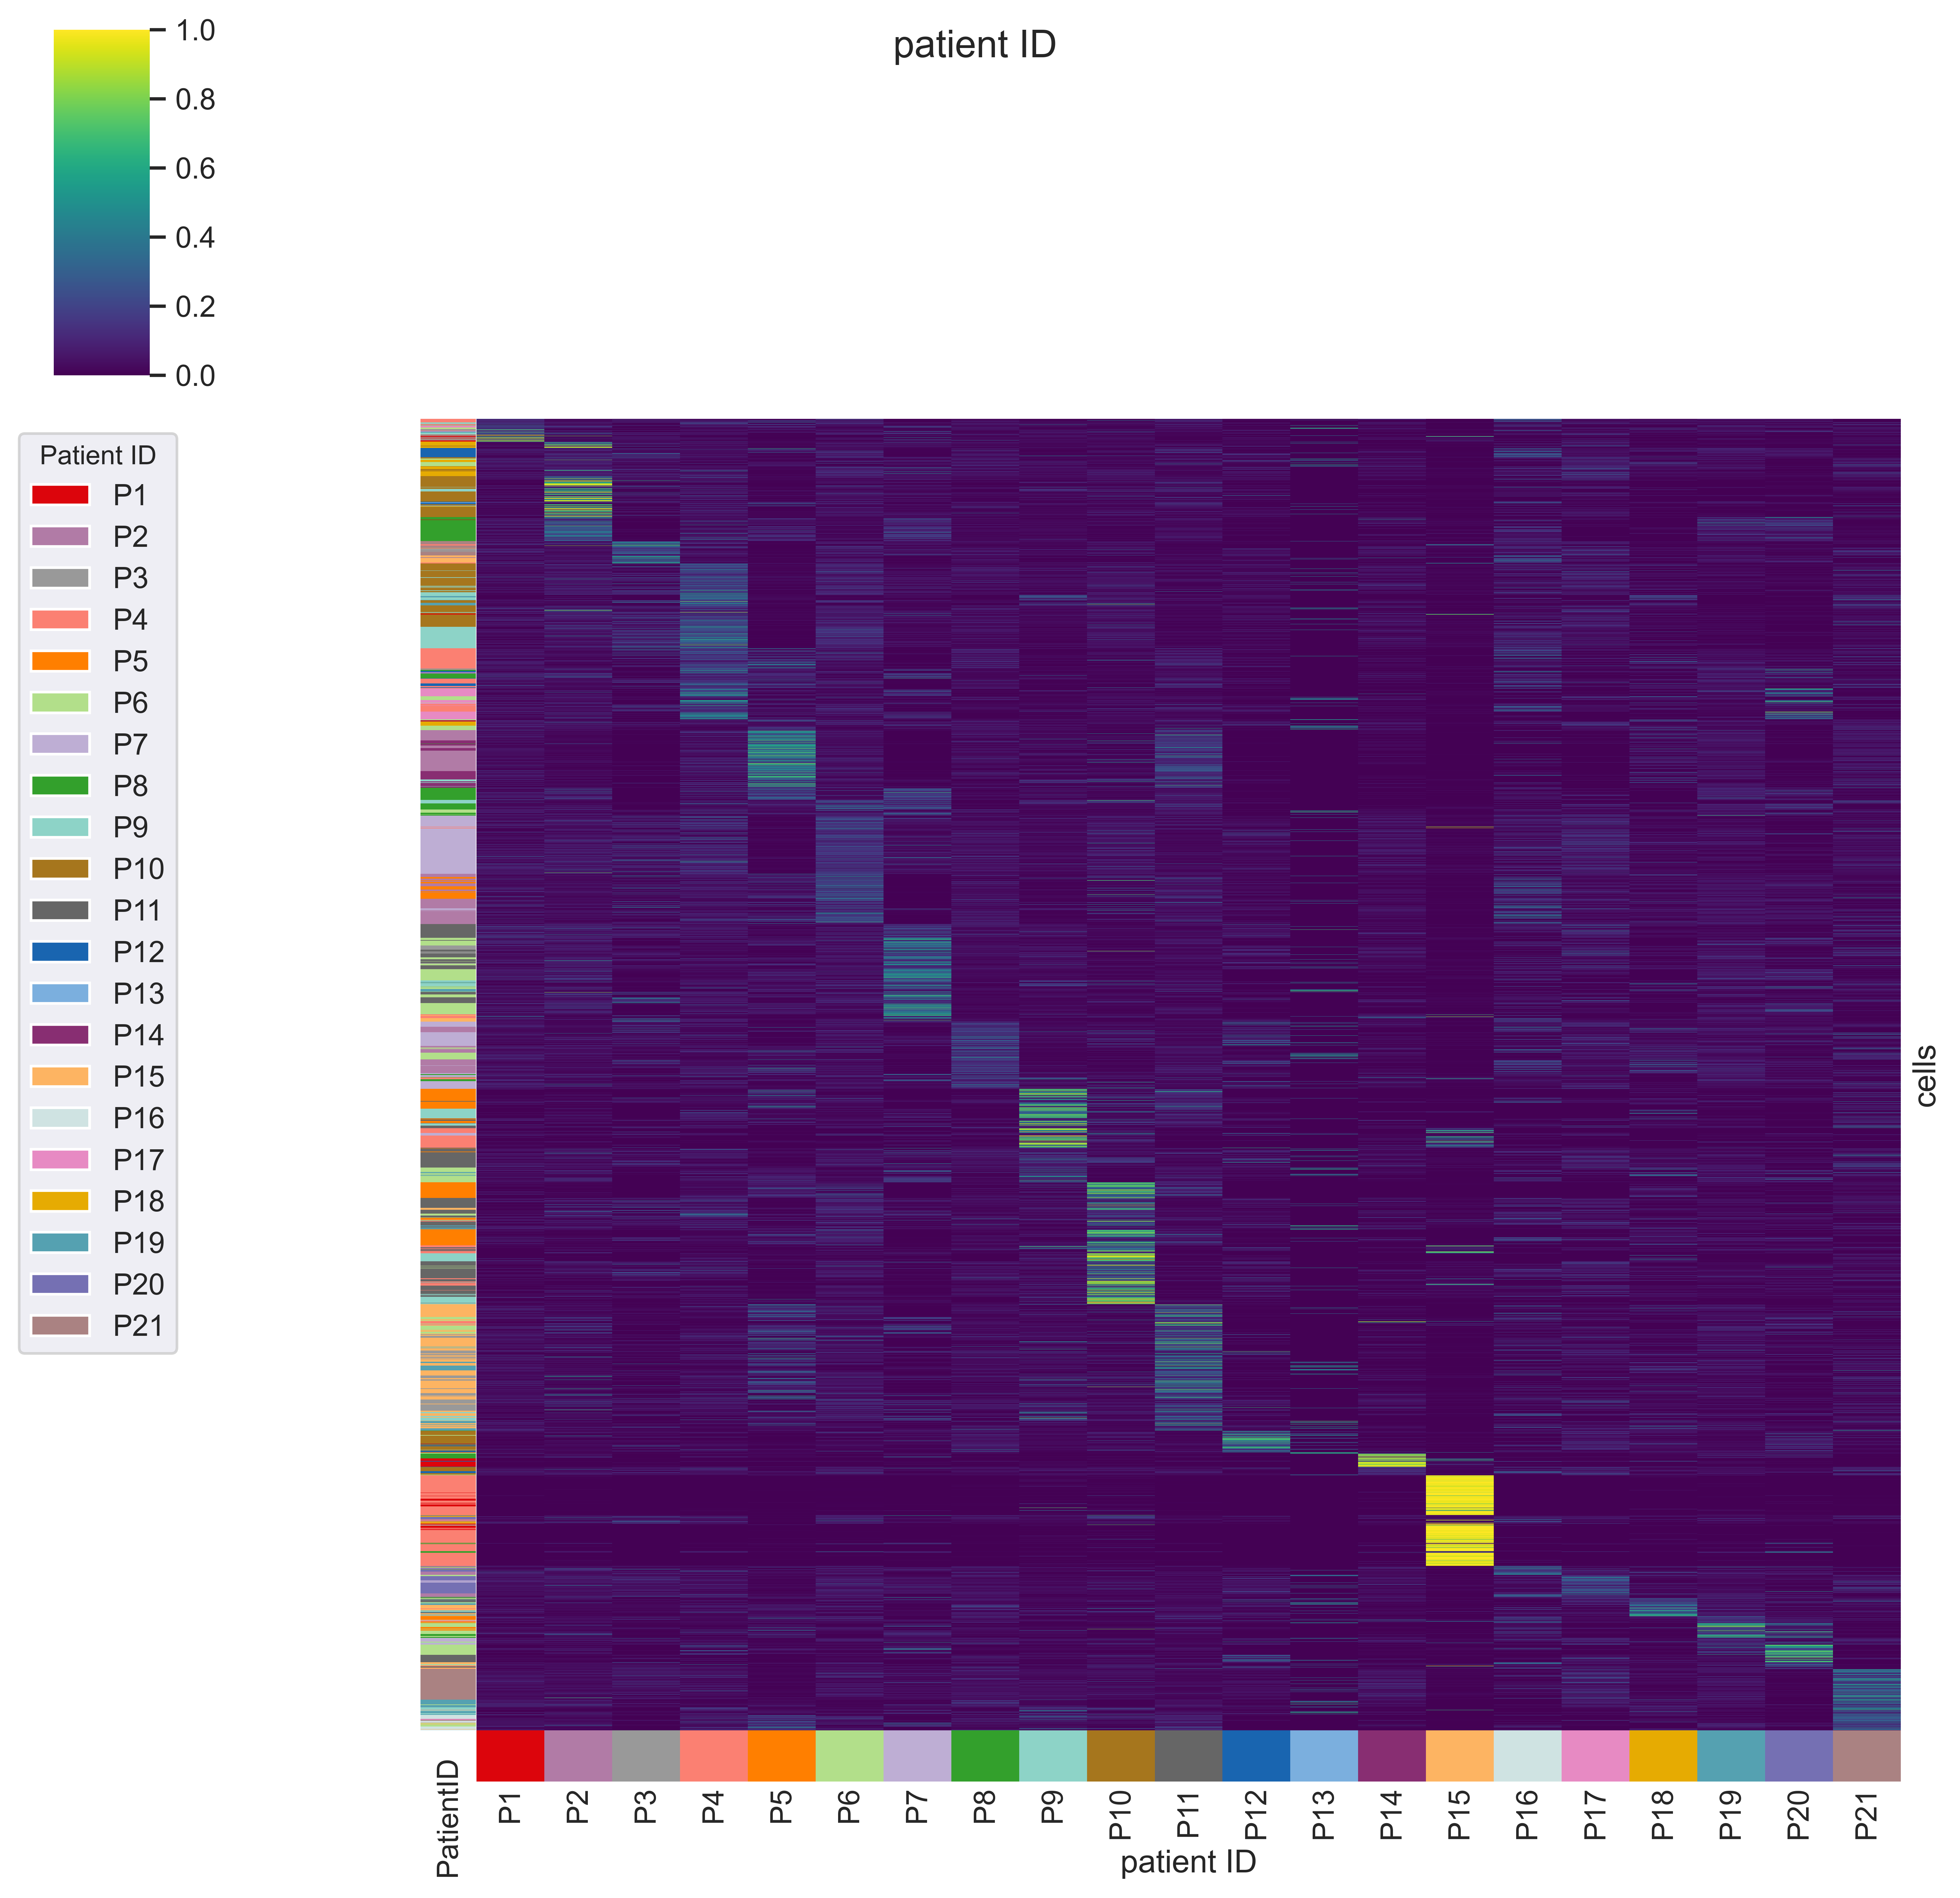

In [39]:
row_colors = meta["PatientID"].map(id_cmap)
col_colors = patientID.columns.map(id_cmap)
g = sns.clustermap(patientID, cmap="viridis", row_cluster=False, col_cluster=False, xticklabels=True,
                  yticklabels=False, row_colors=row_colors, col_colors=col_colors)
g.fig.suptitle("patient ID")
g.ax_heatmap.set(xlabel='patient ID', ylabel='cells')
g.ax_heatmap.tick_params(right=False, pad=15)
handles = [Patch(facecolor=id_cmap[name]) for name in id_cmap.keys()]
l2=g.ax_heatmap.legend(loc='upper right',bbox_to_anchor=(-0.2,1), handles=handles, labels=id_cmap.keys())
l2.set_title(title='Patient ID',prop={'size':10})

# Move column annotation from top to bottom
ax_col_colors = g.ax_col_colors
box = ax_col_colors.get_position()
box_heatmap = g.ax_heatmap.get_position()
ax_col_colors.set_position([box_heatmap.min[0], box_heatmap.min[1]-box.height, box.width, box.height])


plt.savefig(f"{fig_dir}/markers_patientID_cells.png", bbox_inches="tight", dpi=300)
plt.savefig("/Users/adr/Box/iPC_AML/Documents/Manuscript/Figures/Suppl_Figure1/NonMyeloidProgenitor_markers_patientID_cells.png", bbox_inches="tight", dpi=300)
# plt.savefig(f"{fig_dir}/markers_patientID_cells.pdf", bbox_inches="tight")

In [40]:
meta["PatientID"]

0         P1
926       P1
925       P1
924       P1
923       P1
        ... 
78007    P21
78008    P21
78009    P21
77991    P21
79749    P21
Name: PatientID, Length: 79750, dtype: object

In [41]:
patientID

P1        P2        P3        P4        P5        P6        P7  \
0      0.859223  0.000000  0.115712  0.000000  0.002916  0.000000  0.002410   
8591   0.043583  0.019937  0.000000  0.101964  0.110473  0.224143  0.000000   
8592   0.022423  0.005129  0.296201  0.101639  0.012630  0.041185  0.010442   
8593   0.133047  0.000000  0.000000  0.012970  0.062453  0.187355  0.000000   
8594   0.224177  0.037290  0.082836  0.068540  0.022959  0.067379  0.004745   
...         ...       ...       ...       ...       ...       ...       ...   
30103  0.040163  0.055118  0.000000  0.070474  0.090495  0.007377  0.000000   
30104  0.000000  0.054522  0.000000  0.058094  0.123086  0.240814  0.000000   
30105  0.000000  0.008043  0.000000  0.035993  0.257503  0.012918  0.000000   
30093  0.000000  0.026024  0.000000  0.011091  0.160226  0.034831  0.000000   
79749  0.000000  0.023540  0.156870  0.041384  0.000000  0.056711  0.035945   

             P8        P9       P10  ...       P12  P13       P14       P15  \
0      0.000000  0.005051  0.000000  ...  0.000000  0.0  0.010854  0.000000   
8591   0.044341  0.010633  0.203202  ...  0.000000  0.0  0.000000  0.000000   
8592   0.098855  0.005470  0.037636  ...  0.046736  0.0  0.000000  0.005632   
8593   0.000000  0.000000  0.487988  ...  0.000000  0.0  0.000000  0.000000   
8594   0.013823  0.000000  0.003801  ...  0.000000  0.0  0.021368  0.000000   
...         ...       ...       ...  ...       ...  ...       ...       ...   
30103  0.013621  0.166573  0.149808  ...  0.000000  0.0  0.000000  0.000000   
30104  0.148210  0.000000  0.000000  ...  0.000000  0.0  0.000000  0.000000   
30105  0.023851  0.025737  0.019674  ...  0.000000  0.0  0.000000  0.000000   
30093  0.064310  0.157295  0.070732  ...  0.000000  0.0  0.000000  0.000000   
79749  0.008726  0.031385  0.086373  ...  0.000000  0.0  0.080931  0.006463   

            P16       P17       P18       P19       P20       P21  
0      0.000000  0.000000  0.000000  0.000000  0.000000  0.003834  
8591   0.000000  0.000000  0.000000  0.138822  0.000000  0.032282  
8592   0.228182  0.020841  0.000000  0.017855  0.020883  0.000000  
8593   0.000000  0.000000  0.060294  0.000000  0.000000  0.000000  
8594   0.259242  0.018943  0.027707  0.016229  0.075923  0.000000  
...         ...       ...       ...       ...       ...       ...  
30103  0.000000  0.000000  0.000000  0.000000  0.000000  0.312366  
30104  0.000000  0.000000  0.054014  0.000000  0.000000  0.235423  
30105  0.000000  0.000000  0.095615  0.084007  0.000000  0.221396  
30093  0.000000  0.000000  0.051562  0.000000  0.000000  0.266875  
79749  0.065459  0.071745  0.069960  0.040978  0.000000  0.209636  

[79750 rows x 21 columns]